## Submitted by: Nipun Mohindra, D20019 PGPDS July 2020 (Bangalore Batch)
## WEBA Assignment 2

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
import nltk
import os
import json
import math
import csv
import re
import time
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from collections import Counter
from sklearn.decomposition import TruncatedSVD

In [9]:
data_read=pd.read_csv(r'D:\Stu\PGP Data Science\Term 3\WEBA\amazon.csv')

In [11]:
data_read.head()

id       asins      brand  \
0  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
1  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
2  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
3  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
4  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   

                                          categories colors  \
0  Electronics,Computers,Computer Accessories,Key...  Black   
1  Electronics,Computers,Computer Accessories,Key...  Black   
2  Electronics,Computers,Computer Accessories,Key...  Black   
3  Electronics,Computers,Computer Accessories,Key...  Black   
4  Electronics,Computers,Computer Accessories,Key...  Black   

              dateAdded           dateUpdated                   dimension  \
0  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
1  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
2  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
3  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
4  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   

            ean                                          imageURLs  ...  \
0  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   
1  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   
2  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   
3  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   
4  8.900000e+11  https://i5.walmartimages.com/asr/2a41f6f0-844e...  ...   

  reviews.doRecommend reviews.numHelpful reviews.rating  \
0                True                0.0            5.0   
1                True                0.0            4.0   
2                True                0.0            4.0   
3                True                0.0            5.0   
4                True                0.0            5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/4562009/review...   
1  http://reviews.bestbuy.com/3545/4562009/review...   
2  http://reviews.bestbuy.com/3545/4562009/review...   
3  http://reviews.bestbuy.com/3545/4562009/review...   
4  http://reviews.bestbuy.com/3545/4562009/review...   

                                        reviews.text  \
0  This keyboard is very easy to type on, but the...   
1  It's thin and light. I can type pretty easily ...   
2  I love the new design the keys are spaced well...   
3  Attached easily and firmly. Has a nice feel. A...   
4  Our original keyboard was okay, but did not ha...   

                 reviews.title reviews.username  \
0  Love the fingerprint reader             JNH1   
1                         Nice             Appa   
2                          New             Kman   
3                Nice keyboard        UpstateNY   
4             Nice improvement        Glickster   

                                          sourceURLs           upc      weight  
0  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  
1  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  
2  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  
3  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  
4  https://www.walmart.com/ip/Microsoft-Surface-P...  8.900000e+11  1.1 pounds  

[5 rows x 27 columns]

In [12]:
print("Aceessing 4 columns of choice \n")
data4read = data_read[['reviews.username', 'id','reviews.rating', 'reviews.text']]
print("Done!")

Aceessing 4 columns of choice 

Done!


In [13]:
data4read.head()

reviews.username                    id  reviews.rating  \
0             JNH1  AVpf3txeLJeJML43FN82             5.0   
1             Appa  AVpf3txeLJeJML43FN82             4.0   
2             Kman  AVpf3txeLJeJML43FN82             4.0   
3        UpstateNY  AVpf3txeLJeJML43FN82             5.0   
4        Glickster  AVpf3txeLJeJML43FN82             5.0   

                                        reviews.text  
0  This keyboard is very easy to type on, but the...  
1  It's thin and light. I can type pretty easily ...  
2  I love the new design the keys are spaced well...  
3  Attached easily and firmly. Has a nice feel. A...  
4  Our original keyboard was okay, but did not ha...

In [14]:
#Displaying the first 5 rows of chosen columns
print("Shape of chosen columns:\n", data4read.shape)

Shape of chosen columns:
 (7299, 4)


In [15]:
#Displaying the datatypes of chosen columns
print("Type of chosen columns:\n",data4read.dtypes)

Type of chosen columns:
 reviews.username     object
id                   object
reviews.rating      float64
reviews.text         object
dtype: object


In [16]:
# Displaying the information of dataset
print('Information about data: \n')
data4read.info()

Information about data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews.username  7299 non-null   object 
 1   id                7299 non-null   object 
 2   reviews.rating    7135 non-null   float64
 3   reviews.text      7294 non-null   object 
dtypes: float64(1), object(3)
memory usage: 228.2+ KB


In [17]:
missing_cols=data4read.isnull()
missing_cols=missing_cols.sum()
print('Number of missing values across columns: \n')
print(missing_cols)

Number of missing values across columns: 

reviews.username      0
id                    0
reviews.rating      164
reviews.text          5
dtype: int64


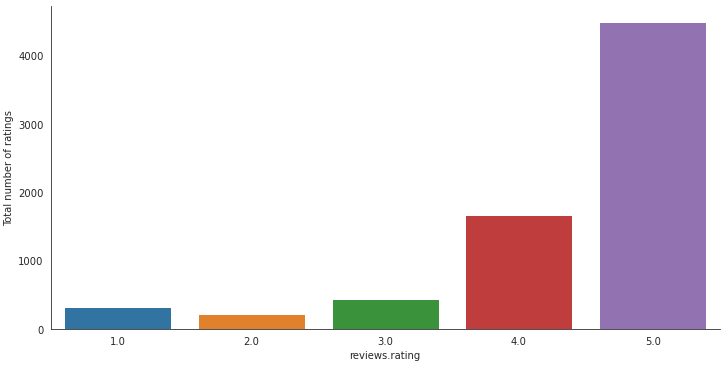

In [19]:
with sns.axes_style('white'):
    g = sns.factorplot("reviews.rating", data=data4read, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [24]:
reviews_read=data4read[['reviews.text']]
print(reviews_read)

                                           reviews.text
0     This keyboard is very easy to type on, but the...
1     It's thin and light. I can type pretty easily ...
2     I love the new design the keys are spaced well...
3     Attached easily and firmly. Has a nice feel. A...
4     Our original keyboard was okay, but did not ha...
...                                                 ...
7294  This remote was a decent replacement for my lo...
7295  This looks good on my celling. Flushes very we...
7296  Great Plate for projector mount, very easy to ...
7297  This mount worked very well for me when I used...
7298  It's a nice solid mounting plate check and mak...

[7299 rows x 1 columns]


In [32]:
import csv

input_file = r'D:\Stu\PGP Data Science\Term 3\WEBA\amazon.csv'
output_file = 'output.csv'
cols_to_remove = [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26] # Column indexes to be removed (starts at 0)

cols_to_remove = sorted(cols_to_remove, reverse=True) # Reverse so we remove from the end first
row_count = 0 # Current amount of rows processed


In [33]:
with open(input_file, 'r') as source:
    reader = csv.reader(source)
    with open(output_file, "w", newline='') as result:
        writer = csv.writer(result)
        for row in reader:
            row_count += 1
            print('\r{0}'.format(row_count), end='') # Print rows processed
            for col_index in cols_to_remove:
                del row[col_index]
            writer.writerow(row)

1

14

2

132

3

54

4

137

5

75

6

157

7

112

8

80

9

179

10

117

11

212

12

52

13

128

14

654

15

112

16

69

17

68

18

96

19

626

20

66

21

419

22

77

23

263

24

349

25

102

26

59

27

128

28

66

29

103

30

111

31

60

32

211

33

86

34

222

35

174

36

94

37

107

38

56

39

123

40

213

41

75

42

94

43

191

44

324

45

401

46

629

47

73

48

54

49

104

50

222

51

86

52

160

53

66

54

722

55

106

56

221

57

104

58

264

59

267

60

76

61

528

62

165

63

54

64

207

65

113

66

172

67

121

68

308

69

142

70

91

71

93

72

86

73

58

74

323

75

695

76

451

77

212

78

463

79

59

80

82

81

206

82

541

83

482

84

83

85

104

86

67

87

198

88

58

89

108

90

191

91

75

92

432

93

56

94

123

95

381

96

263

97

200

98

138

99

146

100

110

101

313

102

177

103

52

104

149

105

105

106

62

107

60

108

137

109

223

110

207

111

266

112

147

113

87

114

99

115

57

116

75

117

98

118

118

119

573

120

157

121

136

122

113

123

102

124

85

125

176

126

208

127

221

128

67

129

1260

130

991

131

121

132

72

133

219

134

277

135

107

136

73

137

155

138

53

139

92

140

61

141

57

142

79

143

94

144

168

145

68

146

144

147

110

148

511

149

332

150

73

151

278

152

80

153

114

154

114

155

56

156

137

157

192

158

194

159

109

160

636

161

100

162

536

163

65

164

264

165

167

166

68

167

77

168

68

169

99

170

161

171

89

172

102

173

81

174

257

175

58

176

116

177

287

178

206

179

387

180

71

181

115

182

297

183

266

184

325

185

132

186

358

187

52

188

139

189

176

190

139

191

214

192

106

193

74

194

231

195

93

196

108

197

272

198

669

199

149

200

133

201

84

202

185

203

55

204

265

205

569

206

126

207

61

208

144

209

52

210

76

211

77

212

147

213

65

214

176

215

92

216

65

217

202

218

99

219

90

220

54

221

186

222

153

223

240

224

188

225

52

226

215

227

76

228

97

229

102

230

159

231

246

232

69

233

111

234

82

235

57

236

77

237

64

238

160

239

224

240

122

241

84

242

258

243

57

244

69

245

166

246

113

247

74

248

227

249

247

250

545

251

74

252

582

253

136

254

784

255

102

256

66

257

82

258

75

259

71

260

149

261

148

262

102

263

117

264

96

265

89

266

305

267

74

268

76

269

59

270

193

271

159

272

99

273

62

274

76

275

92

276

164

277

163

278

227

279

89

280

200

281

116

282

96

283

63

284

92

285

144

286

228

287

250

288

90

289

383

290

54

291

129

292

65

293

67

294

104

295

118

296

105

297

303

298

139

299

2480

300

381

301

225

302

67

303

169

304

75

305

54

306

73

307

115

308

53

309

107

310

155

311

65

312

58

313

117

314

118

315

207

316

322

317

66

318

55

319

193

320

131

321

177

322

161

323

137

324

66

325

349

326

65

327

61

328

228

329

114

330

115

331

88

332

194

333

831

334

96

335

99

336

117

337

156

338

149

339

346

340

126

341

68

342

159

343

131

344

194

345

95

346

79

347

208

348

308

349

63

350

159

351

52

352

69

353

217

354

73

355

703

356

164

357

191

358

153

359

203

360

112

361

201

362

193

363

202

364

209

365

72

366

186

367

124

368

141

369

64

370

265

371

55

372

93

373

273

374

129

375

239

376

153

377

163

378

79

379

89

380

234

381

69

382

151

383

595

384

473

385

95

386

86

387

201

388

188

389

75

390

133

391

387

392

85

393

128

394

86

395

59

396

193

397

101

398

224

399

516

400

56

401

83

402

79

403

251

404

66

405

476

406

144

407

60

408

116

409

55

410

88

411

118

412

133

413

60

414

110

415

321

416

185

417

197

418

219

419

53

420

105

421

70

422

153

423

131

424

72

425

251

426

212

427

218

428

215

429

94

430

36

431

153

432

121

433

154

434

94

435

55

436

91

437

660

438

1208

439

895

440

956

441

511

442

86

443

291

444

56

445

22

446

171

447

1095

448

394

449

35

450

874

451

112

452

519

453

550

454

818

455

55

456

505

457

90

458

86

459

403

460

185

461

370

462

105

463

1243

464

238

465

116

466

316

467

334

468

646

469

408

470

415

471

625

472

602

473

593

474

225

475

631

476

572

477

305

478

186

479

94

480

390

481

373

482

1570

483

70

484

421

485

421

486

343

487

231

488

301

489

144

490

228

491

182

492

131

493

65

494

269

495

97

496

302

497

481

498

323

499

232

500

471

501

962

502

635

503

1722

504

1735

505

1735

506

471

507

471

508

1722

509

145

510

323

511

76

512

192

513

141

514

242

515

224

516

181

517

121

518

218

519

457

520

433

521

359

522

118

523

47

524

262

525

821

526

54

527

82

528

82

529

997

530

215

531

66

532

377

533

85

534

149

535

52

536

67

537

152

538

956

539

433

540

55

541

4

542

70

543

217

544

276

545

52

546

227

547

499

548

88

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 1109: character maps to <undefined>

In [34]:
output_file = 'output.csv'
csv_file = 'output.csv'
txt_file = 'reviews.txt'
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

[13,
 129,
 53,
 136,
 74,
 154,
 111,
 79,
 178,
 114,
 211,
 51,
 125,
 651,
 111,
 68,
 67,
 93,
 623,
 65,
 416,
 76,
 260,
 348,
 101,
 58,
 125,
 65,
 100,
 108,
 57,
 210,
 85,
 219,
 173,
 93,
 106,
 55,
 122,
 210,
 74,
 93,
 188,
 321,
 396,
 628,
 72,
 53,
 103,
 219,
 85,
 157,
 65,
 719,
 103,
 218,
 103,
 261,
 264,
 75,
 525,
 164,
 53,
 204,
 110,
 171,
 120,
 305,
 141,
 90,
 92,
 85,
 57,
 320,
 692,
 448,
 209,
 460,
 58,
 79,
 205,
 540,
 479,
 82,
 103,
 64,
 197,
 57,
 107,
 190,
 74,
 429,
 55,
 122,
 378,
 260,
 197,
 137,
 145,
 107,
 310,
 176,
 51,
 148,
 104,
 61,
 59,
 134,
 222,
 204,
 263,
 146,
 84,
 98,
 56,
 74,
 97,
 117,
 570,
 156,
 135,
 110,
 101,
 82,
 175,
 205,
 218,
 66,
 1257,
 988,
 120,
 71,
 218,
 274,
 106,
 70,
 154,
 52,
 91,
 60,
 56,
 78,
 93,
 165,
 67,
 143,
 107,
 506,
 329,
 72,
 277,
 79,
 113,
 111,
 55,
 136,
 189,
 191,
 108,
 633,
 97,
 535,
 64,
 261,
 164,
 67,
 74,
 67,
 96,
 158,
 88,
 101,
 80,
 256,
 57,
 115,
 284,
 20

In [37]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [38]:
stop_words = set(stopwords.words('english'))
 
# Open and read in a text file.
with open('output.csv', "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader: 
        txt_line = csv_file.read()
        txt_words = txt_line.split()

# stopwords found counter.
sw_found = 0
 
# If each word checked is not in stopwords list,
# then append word to a new text file.
for check_word in txt_words:
    if not check_word.lower() in stop_words:
        # Not found on stopword list, so append.
        appendFile = open('stopwords-removed.csv','a')
        appendFile.write(" "+check_word)
        appendFile.close()
    else:
        # It's on the stopword list
        sw_found +=1
        print(check_word)
 
print(sw_found,"stop words found and removed")
print("Saved as 'stopwords-removed.csv' ")

6

9

is
very


5

to


5

4

but
the


12

7

is
the


5

9

It
is
very


9

and


11

8

It's


5

and


7

I
can


5

7

7

on


4

I


5

the


4

7

the


5

are


7

5

no
more


4

7

The


7

6

12

5

3

2

I


4

this
on
my


8

4

2

9

7

and


8

Has
a


5

6

A


5

with
the


8

5

5

9

9

was


6

but
did
not
have
a


7

5

to


4

a


4

8

The


4

4

has
a


6

5

to
it
and
the


5

are
more


14

10

to


8

9

8

4

2

10

5

7

5

and


12

7

is


6

8

I


5

it
very


12

to


5

with
it
but
i


7

4

the


12

3

5

9

and


9

to
the


8

4

9

if
you


7

12

8

8

For
my


4

the


8

4

9

8

12

8

6

just


6

7

8

it
to


5

on


8

4

3

but
once
it


7

the


5

out
I


5

the


8

and


7

10

I
can
now


8

and


7

5

4

into
my


8

with


7

6

9

It


6

6

5

and
i
have
no


9

8

it
to


10

my


13

The


5

being


7

out
is


5

a


5

6

A


5

have


10

for
the


8

4

9

13

8

for
that


6

is
not


6

4

It's
a
very


5

10

but
the


3

8

should
have
been


11

5

9

6

13

5

12

how


5

it


4

The


5

have


11

8

9

and
don't


5

9

The


6

8

is


10

and


7

the


11

isn't
as


6

as
a


7

10

it
doesn't


5

as


7

it
will


5

or


7

8

it
is
an


10

9

My
only


10

is
that
the


12

7

doesn't


13

5

my


8

I


7

7

have
to


5

my


7

4

6

before
it
will


6

11

the


9

8

is
very


5

3

but


7

it


6

10

to
be


9

This


4

be
a


9

9

5

to


5

That


6

I


6

5

the


8

4

8

I


7

5

the


12

3

6

8

in
very


5

and


6

The


4

on
the


9

are
very


8

5

8

but


11

5

6

and


7

of


5

10

5

10

A


5

when


6

a


7

and


7

is


11

10

6

11

no


12

5

6

to
the


6

13

is
just


8

8

from


11

7

10

and


10

and


7

8

of


4

4

4

7

6

about


11

Having


6

so


5

5

6

10

this
is


8

the


5

and


5

7

than
a


4

of


7

10

on
the


7

for


8

and


8

10

4

8

10

5

11

5

5

10

5

9

between


4

4

8

5

and


9

5

by


9

3

5

6

7

7

10

10

and


6

12

7

for


5

10

7

all
in
a


5

6

9

8

for
the


8

4

2

and


5

10

11

with


8

4

4

9

is


6

and


6

7

5

that
it's
the


6

5

3

did
not


4

the


8

4

2

because
my


8

4

2

has
been


9

me
very


6

I


7

to


8

4

the


4

4

and
this


16

the


8

6

8

6

19

the


7

11

is


11

10

so


5

so
that
I


7

why


10

did
not


6

from


7

10

you


4

this


10

it
will


7

your


7

11

on
the


8

5

of


11

It's
a


5

10

I


5

the


12

8

its


5

and


10

3

7

this
for
my


8

4

2

6

7

it
has


8

7

for


6

6

9

I


5

this


5

6

because
it


6

6

in
the


5

when


9

it


8

the


5

5

5

a


5

8

7

10

this
for
BOTH


4

2

4

8

I


7

this
for
my


8

4

3

All
I
can


4

is
that
this
is
an


8

9

2

6

the


5

of
a


5

9

with
the


5

7

6

and
the


12

is


7

9

11

your


13

very


5

and
I


5

other


8

13

will


8

this


8

in
the


5

7

just


5

other


4

5

on
my


7

This
is


12

and
very


12

I


11

5

the


8

4

10

10

6

6

with


8

4

3

6

7

8

6

5

4

5

the


9

is


11

No


8

with


4

9

and
it


6

7

9

No


10

with
the


11

6

10

12

7

is


7

6

and


10

3

haven't


12

5

6

with


4

but


13

the


6

4

is
a


7

too


12

6

5

5

a


10

10

don't


4

the


9

but
the


12

7

6

as


13

6

10

12

8

does
not


5

for


5

I
own
a


8

4

2

and
this
is
by


4

the


5

7

6

for
this


8

It


8

6

5

a


5

10

The


7

6

7

6

5

and
is
a


5

7

It
is


5

8

which
is


7

This


9

is


10

for
the


8

It
should
have


5

5

with
the


8

6

are


6

8

13

is


5

8

12

7

6

7

9

is


9

This
is
a


5

9

8

over
the


9

8

4

2

9

and


6

6

6

of
the


6

7

The


5

5

7

The


12

12

10

6

but
not


8

7

just
be
my


14

I


5

the


4

the


9

just


7

to
the


8

5

9

is
a


5

12

over


8

2

5

10

7

is


5

7

10

6

8

9

12

8

6

5

a


7

No


7

or


12

6

7

5

this
is
a


5

10

if
you


5

to
own
a


9

this


9

6

6

with
the


8

4

3

9

9

and
is


12

to


5

6

4

8

is


6

7

having
a


7

of


11

and


11

this
is
the


5

4

5

I


5

the


12

3

for


8

in
and
the


5

of
the


6

It's


5

very


11

as


9

to


6

9

11

I


5

it


7

9

from


7

by
the


4

of


10

12

5

9

with


12

9

Does
not


7

5

but


6

be


4

to


8

4

6

was
an


8

from
my


8

8

2

5

The


11

is


9

the


5

5

6

and


12

A


4

10

but
the


8

is
not


6

8

7

10

5

6

is
a


6

8

and


5

to


5

on


10

The


5

9

is


5

with


9

11

7

or


5

them


5

The


6

4

is


8

11

and


9

7

The


6

12

8

is
a


5

8

to


5

into
the


9

it
is


9

and
you
can


4

9

13

to


6

6

I


6

that
the


8

4

2

6

have
a


9

that


6

5

with
the


8

4

2

I
was


11

When
I


10

this


10

I
was


10

9

The


9

has
a


7

8

and
a


7

10

It


6

to
be
a


4

more


9

6

The


12

3

8

is
an


6

14

your
are
a


8

4

2

or


2

7

this


9

is


5

6

the


8

I


10

a


8

4

2

5

6

The


8

5

of
the


8

was
the


5

7

The


9

was
too


6

and
the


5

were
too


6

10

This


4

5

6

8

the


6

The


9

7

and
more


12

I
no


7

have
to


6

a


9

6

8

The


5

are


7

7

and
the


12

7

6

10

the


7

a


8

This


6

is


5

10

11

with


4

2

2

3

I
did


5

5

4

5

because
there
is


6

no
where
to


6

the


5

10

I


6

this
is
a


5

8

for
any


8

4

2

7

It


8

9

the


10

of
the


9

I


7

5

the


4

8

and
the


12

7

6

6

3

10

9

and
i


5

the


12

7

I


5

how


7

the


4

6

4

The


12

6

is
very


5

to


5

It
is


6

and


8

7

have


6

it


2

6

if
I


6

7

out
how
to


7

the


6

4

13

It


4

5

an


7

from


11

10

6

5

6

I
have


7

5

to
it
so
its
not
that


4

of
a


5

9

So


5

7

to


4

than
a


8

7

6

8

6

on
and
off
with


5

6

the


9

of
a


12

8

7

7

6

and


7

6

5

this
is
a


6

12

over
the


9

8

4

2

5

8

This


9

and


9

our
a


5

have
when


7

a


8

5

9

is
just


6

a


10

Its


4

a


9

11

into
the


7

of
the


8

4

3

8

there
are


6

when
it
just
does
not


10

4

not


5

if
this
is
a


9

6

or
a


7

6

but


7

4

its
a


6

6

10

the


9

will
not


5

as


5

as
you


8

it
into
the


8

10

it
will
just


5

8

4

7

9

4

to
the


7

of


9

I
have


12

with
the


8

4

2

I
am


9

to


8

it
is
a


7

9

9

after


10

my


8

4

2

with
a


6

4

4

I


6

11

the
same


9

with
the


10

I
will


4

I
have
not


9

the


9

at
all
so
I


4

just
have
a


7

10

6

6

6

for


8

and
it


6

it
so


5

to


5

into


8

with
the


12

9

3

10

this
for
my


8

4

3

With


7

13

this


6

the


12

8

on
the


9

13

The


4

11

6

be


5

17

8

the


9

8

12

7

5

9

6

11

12

8

Should've
been


9

6

the


11

5

9

is
a


6

12

over
the


9

11

are


7

out


6

the


10

is


7

and
the


12

7

is
a


5

7

Most


7

won't


5

the


12

8

is


4

6

so


7

you


5

it


4

the


8

10

7

5

7

than


9

8

5

the


9

of
the


12

10

5

it


5

in
more
than
just
the


6

6

8

6

is
a


4

5

of
my


5

and


6

and
the


11

6

10

7

6

just


9

11

9

7

of


5

9

11

the


7

6

9

for


10

7

4

for


12

8

over
the


8

13

5

to


4

i


6

5

it
if
i


7

the


9

the


8

4

2

8

has


5

12

for


7

into


9

which
is


10

12

7

6

is
only


7

when
i
don't


5

to


5

my


5

up
with
the


8

if


6

8

can
be


4

for


8

8

then


11

6

4

6

8

an


4

for


6

I
haven't


5

the


9

for


4

the


7

itself
is


7

10

it


8

5

the


6

on
the


6

6

I


7

10

this


9

if
you
have
a


8

4

3

It


6

the


11

5

4

7

5

the


9

6

7

6

9

to
the


4

5

The


12

4

6

7

in
so


5

9

4

you


4

a


8

4

3

you


5

6

It


6

it


5

8

6

the


12

9

is
not


7

that


6

It's
not


6

5

having
a


8

but
at


6

you
have
a


9

11

5

5

why
they
do
not


8

these
with
the


9

but
a


5

6

The


12

6

is
VERY


7

This


9

is
a


4

7

than


8

10

I


5

the


5

and
the


9

6

the


6

7

5

I
can


5

more


5

a


5

9

then


9

6

5

6

10

7

8

aren't
too


6

Very


5

to


5

4

7

6

8

is


6

for


8

in


5

12

5

6

5

8

The


9

7

7

from
the


6

10

on


6

I
just
don't


11

why
a


8

7

6

have
a


5

7

9

5

5

4

The


5

are
too


5

for
me


9

to
the


8

4

2

9

and
my


4

10

I


9

this


7

4

5

I


8

out
the


6

5

for
the


5

6

with


13

No


5

No


10

6

10

6

9

8

6

They
are


5

more


5

9

and


12

than
the


5

4

from
the
same


9

7

6

7

the


12

7

10

has


8

8

up
my


13

9

6

6

and


12

3

7

6

7

and


5

6

10

A


4

6

for
my


8

but


10

8

to
have


3

8

it
was
a


6

10

and


5

7

than
the


4

2

11

9

the


7

12

9

does
the
same


6

as
the


12

4

so
why


5

have


4

I


5

this


5

and


7

a


9

5

4

8

4

2

9

8

the


4

4

6

I


5

It
was
not


6

the


6

8

11

has
the


8

that


5

the


8

can


8

your


8

It
was


4

there
on
the


8

4

3

the


6

9

for
me
being
the


10

It
was
a


5

10

and
a


6

7

when
it


6

10

Then
after


9

5

it


7

6

but


6

5

5

a


5

18

the


7

10

9

with
the


5

and


6

with
the


5

6

10

and


10

11

It's


5

10

6

4

is


7

and
more


11

5

are


7

6

7

and


5

8

and


8

a


12

6

7

6

on


6

9

as
of


6

9

this


9

is


7

6

4

how
I


5

when


6

9

6

8

4

6

5

5

7

10

but
this


4

is
by


4

the


6

5

10

with


9

11

and
does
not


5

7

The


9

on
the


5

is


5

5

7

it
is
a


6

7

10

The


12

7

was


5

to


6

and
is


9

and


5

to


5

I


5

to


4

the


5

4

with


9

with


9

and


9

9

to
a


8

with


10

No


12

I
was


5

to
do
so


5

more
with
the


10

5

7

itself
is


11

But
I


5

to


6

a


9

6

4

6

a


10

7

I


6

4

the


7

6

5

4

at


6

have
not


4

8

out
how
to


4

it
for
my


10

9

3

did
not


8

that
the


8

5

the


7

as
a


6

of


15

to


4

4

10

I
wouldn't
have


7

the


9

with
the


12

4

9

there
have
been


8

6

where
the


7

has


6

a


7

or


4

to


7

out


7

6

4

or
didn't


5

on
for
some


8

so
I
was


5

to


4

7

into
the


8

8

by


10

the


12

4

6

5

that


5

5

4

it
has


7

8

and


9

The


8

of
the


5

is


9

over


8

9

7

9

to


3

6

with
my


5

4

8

is


8

and


13

the


8

4

5

6

with


12

3

has


7

9

with
the


8

4

3

The


12

3

is
a


10

8

that


6

it


6

and


5

to


4

the


8

4

9

and


7

This
was
a


4

8

at


6

to


4

up
but


5

6

the


15

8

6

be


5

to


6

the


12

7

11

as
you


5

your


7

7

in


9

10

to


8

the


12

8

to


10

14

will
not


10

13

just
be


5

6

7

is


5

very


11

9

2

the


6

8

10

in


6

3

7

10

the


5

5

7

10

in
the


4

7

for


8

4

3

but
having
the


12

10

5

a


4

of
a


4

7

2

3

have
a


8

4

2

and


5

4

I
am
an


5

5

and


9

8

12

I
have


9

my


6

5

3

7

with
this


5

it
is


8

and


5

9

I
had
an


6

5

6

6

which
I


5

and
was


6

with
it


7

for
the


10

The


6

4

6

9

with


12

is


5

8

more


12

6

5

more


5

a


7

9

and
the


12

7

6

me


5

8

7

to
my


9

I


5

it
as


12

This
is
a


6

10

7

than
my


8

I


7

10

this


9

7

and


6

8

for


11

and
the


12

3

is
very


12

7

13

4

is
a


8

8

for
my


8

5

5

2

5

9

The


5

6

for
the


8

4

2

was


12

to
me
and
is


7

The


6

between
the


5

is
a


5

13

The


12

7

is
a


6

9

to


8

into
the


11

This
is
a


6

10

for
my


8

6

10

I


7

this
to


4

with
my


4

8

4

2

5

it


6

6

11

5

the


12

8

5

the


12

6

6

the


2

4

6

for
this
only
and
I
don't


7

4

This


6

5

a


5

5

10

4

5

it
to
have


7

but


5

7

not


7

12

6

9

with


12

12

which


7

4

of
the


6

4

6

9

6

in
about


2

8

I
did


10

8

on
it
and


11

that
it
was
a


9

8

5

9

was
the
only


6

not


10

5

4

was


7

They


9

the


9

5

7

I
didn't
have
a


10

This
was
a


8

5

7

so
I
wouldn't


7

4

4

that


10

you


4

5

4

The


7

4

6

6

5

No


7

at


5

3

5

for
the


6

4

11

6

10

with
the


8

and


8

7

3

The


7

6

8

11

the


5

to


6

a


9

to


4

in
and


6

8

I
to
the


8

4

a


6

6

6

is


6

and
it


6

with
my


8

4

2

which
is


13

I


4

the


12

8

all
the


5

and


6

haven't
had
any


8

It's
a


6

4

7

to


5

with
being
as


7

the


5

are


7

out


7

the


6

9

8

It


6

the


5

of


7

very


6

and
not


5

your
on
a


7

5

it


6

5

your


4

a


5

10

3

4

my


8

4

2

7

in


7

6

but
not
because
there
is


9

6

with
this


10

I
have
no


11

about
this


10

The


5

are


12

and


12

9

I


11

the


9

of
the


12

8

as


7

7

6

your


6

on
the


7

6

3

9

It's


6

when
it


7

about


7

of
the


6

Most
of
the


5

you
just
have
to


5

on


5

the


7

8

8

that


5

7

The


9

is


6

and


8

more


6

to


6

The


12

is


5

to
have
but


6

more


5

doesn't


7

5

my


8

The


7

6

8

6

6

and
is


6

to


10

you


2

9

very


11

and
being


5

4

is


8

and
it's
very


7

5

10

10

6

with
my


8

I


10

this


8

to
all


7

of


10

10

6

is


6

for


8

7

6

when
the


10

9

7

9

too


5

of
the


7

or
you


7

5

the


8

9

of
an


7

10

I


4

10

for
a


8

so
this
was
an


5

7

and
the


12

to


7

8

is
just


7

7

10

this


10

8

the


8

of
the


5

9

is


9

very


6

It
no


7

6

5

it
is


8

when
you


6

13

8

to
be


8

5

and


4

will


6

4

12

over
the


5

9

for


8

6

5

to


4

a


7

more


6

in
the


5

9

and


7

13

to


9

when


9

are
on
or


6

in
a


5

13

The


4

6

is
just


5

you


6

have
with
a


8

It


6

7

as
a


4

6

for
the


8

I


7

it
for


12

but
it
so


7

that
i


5

4

Very


7

11

5

4

for
all
the


8

7

6

9

of
my


6

7

to
do


7

with


6

8

with


10

9

7

6

8

most


12

8

7

6

12

is
a


5

8

but
the


7

8

4

2

I


7

has


5

12

so
all
you
have
to
do
is


5

at
the


7

and
it


6

who
you


5

5

the


4

6

5

and


4

5

13

4

7

in
an


8

8

this
has


7

out
to
be
a


6

10

to
the


8

6

5

the


15

7

2

5

of


7

5

for


9

6

it


5

to


5

on
the


8

5

13

8

is
a


5

9

I


6

5

but


8

6

6

4

The


5

of
it


6

as


5

as
the


4

10

I


6

down
on
a


4

and
the


4

10

10

to
the


7

6

the


6

of


9

9

and


5

7

6

7

This
is
the


5

6

9

6

5

the


5

9

up
for
in
the


5

7

and
the


5

5

7

and
the


5

6

when
you


6

4

you
have
a


7

10

the


12

7

6

8

on


5

9

Having
the


7

out


5

and


6

6

4

have
been
very


8

8

to
the


4

9

9

6

17

12

6

6

The


7

6

8

6

6

and
the


9

7

are


9

6

it


6

and


5

to


4

5

the


9

8

12

to


7

8

10

5

it
so


5

7

to


7

my


8

having
to


5

in


10

5

it


5

18

14

4

9

4

not
that


9

I


11

5

the


5

of


5

and


6

9

but


7

the


4

the


9

has


5

for
some


8

7

7

them


3

9

In
my


6

4

I
had


6

a
few


8

9

6

while


11

to


5

and


6

9

4

5

they
have
a


4

to


8

the


6

5

8

on
the


15

7

is


2

7

6

5

11

for
the


13

haven't


5

it


11

7

12

7

is


8

and


7

with


9

a


8

7

of


9

now
that
it
has


6

10

6

5

with


5

4

16

5

a


5

6

I


4

the


12

7

to


8

4

5

7

of


4

9

6

10

9

The


4

9

with


6

3

6

6

for
my


8

6

It
was


5

to


8

and
is


5

to


4

on
a


6

6

for
my


5

5

7

6

8

6

7

and
the


4

7

6

this
a


5

5

10

A


5

14

The


8

4

5

6

with


12

3

is
a


5

have
for
your


8

5

6

11

3

5

4

but
the


3

6

to
be


9

6

4

7

there
is


7

7

I
own
a


8

4

2

and


10

this


9

because
of
the


6

3

2

6

9

This


6

9

is


5

7

then
the


4

2

9

10

It


5

7

4

5

a
while
for
the


8

to


4

to
the


6

where
it


11

it
each


5

I


8

it
but
it


6

7

I


5

the


13

when
my


5

is


7

in


4

5

to
me
and


4

6

9

7

10

I
had


8

the


12

8

6

be


9

of
a


9

but
I


4

it


6

5

I


4

into
my


8

4

3

The


8

9

is


5

a


6

9

A


5

have
for
your


7

6

5

to


7

to


7

5

5

5

7

6

3

5

5

10

is


6

5

8

5

I


6

the


6

6

to


4

the


6

with
the


12

9

Now
that
i


4

my


8

i


7

on


8

6

and


4

the


7

8

very


12

When
i
was


6

the


7

as
a


7

8

9

10

the


7

was
a


7

With
the


7

not
so


6

So
now
the


12

8

5

7

7

and
i


9

6

have


6

some


6

by


8

the


8

5

7

Not


6

10

11

9

is


6

7

5

to


5

4

A


7

6

when
not


5

down
as
i


5

this


8

I
am
not
a


6

7

5

of
a


5

and


5

6

so
the


5

that
it
isn't


5

6

doesn't


7

me
too


6

I
just


5

9

6

5

a


9

6

that
doesn't
have
a


9

when
i


5

11

but


5

to


7

12

7

11

7

5

to


7

the


12

12

6

on


8

i


8

10

6

10

but


10

on
your


9

6

the


8

5

6

6

be


5

8

Not


5

how


5

it
is
to


6

7

the


12

8

or
the


8

5

an


8

about


12

6

a


7

6

8

to


6

12

9

It
is
a


11

5

in
the


9

11

4

4

a


5

6

if
you
own
a


8

4

is
a
no


8

2

you


8

11

9

is


7

12

8

to


5

4

and
very


6

5

the


7

that


6

5

a


6

to
the


8

4

is


7

9

9

then
is
if


4

should
by
this


6

2

with


12

4

I


11

5

and
do
not


7

7

12

3

6

7

6

and
is


7

12

8

in


8

with
it
is


6

5

and


6

the


9

is
that
I
did
not


5

5

that
i


9

4

that


5

10

of
the


12

3

2

8

that
I
did
not


9

7

for


6

7

than
just


8

if
the


5

I


4

6

9

It


4

to
be


6

8

if
the
more


10

and


8

have
this


8

the
more


11

will


4

this


10

I


6

5

to


4

it
for


7

in
my


9

9

for


16

this


9

is


6

the


7

but


5

in


5

that
you


6

be


7

6

for
a


7

8

more
than


11

6

7

9

11

over


9

12

10

12

12

is


9

and


11

A


8

10

for
this


8

A


5

have
for
the


5

9

6

9

and


5

11

The
only


9

6

is
having
to


8

the


7

because
the


7

6

8

6

8

from


5

to


6

Don't


5

of


7

because
of
the


9

or
the


9

4

I


4

a


4

8

2

and


5

be


6

not
to
have
a


10

The


5

are


9

but
they
are
a


4

8

so
don't


6

you're


6

to


5

5

a


7

I
was


7

it
only


5

in


6

with
the


12

3

but
it


6

5

so
it
was


6

the


6

6

The


6

3

is


5

5

9

than
other


8

as
this
is
the


6

8

not
the


6

9

11

8

Very


13

6

and


5

9

11

6

4

7

10

with
this


10

7

6

9

7

is


5

and
very


5

to


10

my


6

just
as


5

as
my


7

3

5

5

10

6

6

6

13

6

6

8

from
my


9

8

4

2

10

The


12

8

is
a


7

The


7

6

7

is
a


5

9

to
this


9

it


6

7

the


5

5

is
the


10

9

5

that
it


5

8

to


8

4

and


12

12

is


6

5

not
having
to


5

in
just


6

a


7

6

6

it
so


5

8

6

9

7

9

just
doesn't


5

to


5

6

8

10

5

7

it
doesn't


7

me
to


6

my


8

7

5

I
don't
have
a


12

9

The


9

I
had
before
wasn't
the


9

until
I


4

this


4

The


7

6

3

8

6

8

into


8

11

and


7

As
a


6

11

I
don't


7

have


5

to


5

a


9

3

11

5

the


12

4

as
I


6

it's
more


7

than
just
a


10

It's


7

8

5

4

9

is


8

9

and
the


11

of
the


5

is


11

10

I


12

9

a


6

7

12

5

are


5

4

and


7

for


12

8

While
the


12

7

does


4

an


6

6

of


9

and


22

it
doesn't


10

4

6

14

8

3

has


7

6

that
you'll


7

4

more


6

than


6

But
having
the


7

6

7

can
be


7

If
the


6

few


6

doesn't


7

to


5

why


6

5

12

8

6

11

for
me
for


8

4

I


5

the


9

of
the


5

and
the


6

9

is


7

than


6

4

7

a


7

10

I
have


6

6

but
it's
a


8

8

and


6

6

11

Other


6

7

6

be


9

4

5

to
have
my


4

in


5

8

3

7

If
you


5

the


16

then
this
is
a


5

7

7

6

3

6

and


8

that


8

of
yours
and


4

the


12

7

9

to


5

5

8

in
to
your


9

5

a


7

4

of


9

to


6

how
to


6

your


7

to


4

just
the


6

8

but
now


4

in
and


6

it


5

7

than
any


10

6

9

for
the


7

12

8

6

5

2

6

10

This


9

6

in


5

when
you
just
don't


5

to


5

on
the


8

I


7

10

the


6

3

5

6

is
a
very


5

10

the


4

12

3

5

some


8

5

4

but


6

8

14

9

was


6

and


5

the


7

6

10

I


5

the


12

of
having
this


10

9

it


10

doesn't


5

my


7

6

but
when
it
does
it's


5

and


6

6

9

6

up
to
its


10

The


5

are


6

and


5

to


5

I
have


5

12

7

6

before
with


5

9

but
this


4

6

10

6

No


13

7

9

7

7

6

5

5

and


6

when


8

9

6

4

7

than


6

10

and
the


12

8

6

it
very


5

to


6

with
just
a


8

6

and


9

7

on
your


5

10

is


6

5

are


12

7

3

6

7

6

3

have
been


6

the


3

8

4

6

the


6

9

I
have


7

6

the


5

on


10

This


4

9

from


10

is


9

in


5

5

to
the


9

8

and


8

4

11

The


7

8

are


9

7

and


7

a


7

further


7

This


7

for
a


8

7

12

I


5

that
it


6

7

than


5

some


8

I
have


7

6

The


9

of
a


12

7

is
a


6

4

9

Being


5

to


5

10

of


8

6

is
very


6

Its
a


6

9

but
when
I


6

my


9

and
my


8

6

me
a


9

7

it


6

my


6

5

4

10

are


7

a


7

8

and


7

to


5

at


6

8

as


5

8

9

5

11

It


9

13

to
the


8

and


6

as
a


6

for
the


8

Very


5

9

5

5

5

to
the


7

9

is


7

Your


8

10

8

a


7

when
the


9

is


10

This


4

has
the


12

7

which


6

11

with


8

6

to


4

you


4

Didn't


5

6

the


7

to


4

in
because
it


8

on


8

you
in


13

and


10

it


7

me
in
and
I
wasn't


5

8

at
the


8

The


12

7

6

5

8

6

5

to


6

a


7

and


9

in


5

4

it


7

3

5

the


5

of
the


5

and
the


8

7

of
the


4

7

The


12

3

8

is


6

for
a


6

5

in
and
I


5

the


9

it


10

9

10

it
doesn't


10

my


6

and
I
have
to


4

in


4

7

with
my


11

3

7

5

having
a


9

to


8

my


7

5

This


5

the


6

I


6

7

a


7

11

but
for
an


6

10

it
is
not
a


5

8

5

7

than
the


8

4

2

10

5

6

11

8

6

11

for
what
it


4

9

does


5

as


13

6

9

5

to


5

No


10

6

10

10

7

for


13

9

13

only


5

it


6

4

out
for


4

as


7

7

3

7

to


4

out
the


12

9

and


4

5

i


6

the


6

7

it
is
very


11

and
there
are


5

of


5

5

that
can


8

5

very


5

10

can


5

my


7

8

of
a


8

4

4

very


7

8

This


4

12

5

9

is


4

of
the


5

8

7

or
the


8

4

5

for


4

This


7

6

8

on
such
a


8

I


6

10

this
to


10

The


9

and


6

4

are


4

8

over


4

2

5

The


12

7

6

12

with


8

3

6

7

6

5

than
a


7

to


5

up
and


11

7

11

Don't


4

it
for


4

6

that
has


6

8

8

Just


9

7

these
for


10

They


5

6

I


5

the


4

10

I


11

5

that
it


5

my


8

4

3

I


5

5

the


7

6

12

3

5

for
your


8

3

6

very


10

are


11

and


6

11

for
a


7

10

when


7

I


5

the


7

6

to
be
some
what


8

6

the


8

has


5

13

I


4

it
for
the
same


6

as


8

9

I
wouldn't


4

6

for


5

I


6

my


9

8

9

but
this


4

is


5

8

The


4

8

is


6

and
the


9

is
more


12

The


5

8

is
the


12

8

That


6

is


6

the


9

6

9

not
only


6

8

4

7

5

11

8

but


5

5

as
a


6

for
the


7

or
can
be


9

to


4

as
a


5

for


7

6

The


6

4

is
a


5

7

7

so
it
won't


4

the


7

5

5

of
other


11

6

9

to
the


8

5

3

5

the


12

7

is


5

to


4

up
and


11

the


7

at
any


8

9

wouldn't


4

the


11

4

7

Don't


7

5

4

10

is


9

5

9

than


6

be


10

9

8

a


6

9

to
the


4

9

8

on
the


7

can
be


7

12

but
with
the


9

it


6

it
a


4

8

9

you
can


10

5

the


7

into
a


5

7

with
this


9

and
a


10

7

The


9

8

is
very


5

and
it


9

the


7

from
being


10

when


9

6

is
a


9

that
will
not


5

your


8

12

your


6

or


10

your


6

It's
a


9

and
it
has
a


6

5

than
the


10

The


12

7

6

very


6

It
can


5

be


5

as
a


7

for
a


4

9

8

8

4

you


4

the


9

the


9

is
a


6

So


4

I
have
had
no


7

8

and


11

I


10

the


9

with
the


12

7

but
haven't


4

that
up


5

The


6

6

to


5

6

for
me
and
while
it
isn't
a


9

10

7

on
it


6

12

5

6

and


5

to
the


7

9

6

very


5

but


4

not


10

with
the


12

3

9

It's


14

and
a


4

12

at


7

6

was


10

as
an


8

from
a


8

6

5

7

The


8

and


6

of
the


5

on
the


4

6

is


4

9

to
the


6

7

The


7

9

is
a


6

5

7

than
the


10

The


12

7

6

16

14

the


9

and


12

it
will


8

8

it


5

into


16

Couldn't


5

a


7

7

for
the


8

5

I


6

this


7

with
the


6

9

in
the


12

9

5

4

the


7

and
the


12

and
they
both


5

7

5

12

7

6

5

for
the


6

the


7

does
not


10

5

7

9

7

11

9

8

5

for


6

5

7

13

5

this


9

and


12

8

is
a


5

6

5

to


5

and
my


8

4

6

6

just


5

having
a


6

10

I
have
a


8

4

2

that
I


4

for


5

and
a


8

4

2

for


10

The


4

5

6

is
a


4

6

than
the


2

4

The


4

8

6

8

I


5

the


6

7

6

7

for


7

5

4

6

6

my


7

8

Not


5

to
the


12

11

5

just


5

it
had
a


7

5

A


4

12

on
this


6

9

I


6

11

10

it


7

very


6

Only


6

I
don't


5

is
the


9

has
some


5

to


4

Not
the


6

but
the


7

10

When
you


5

is


7

6

so
the


9

doesn't


5

6

6

its
an


6

because
of
how


5

it


5

7

7

9

to
my


8

4

3

the


12

7

6

5

and


10

3

did
not


7

to


5

this


9

as


5

as
I
do


2

not
as


5

as
a


5

10

but
very


8

5

12

6

9

4

up
is
so


6

I
had
a


8

8

a


4

6

it
was


10

7

6

5

6

9

as
in


7

of


9

I
had
to


9

the


10

With
this


4

and
its


12

in


13

11

6

10

3

5

that
the


5

6

up
for


4

I


5

5

that
they
only


6

up
when
in


5

which


6

8

6

and


8

6

11

I


13

4

the


12

9

8

the


7

12

on
my


8

6

it


5

11

I
did


6

4

it


4

I
have
not


5

it


6

7

it


4

be


5

for
when


6

my


9

in
a


5

6

My
only


12

is
that
I


7

7

the


5

of
the


7

8

6

the


5

7

You


6

8

you


4

5

to
do
that
until
you
don't
have
it


5

It
has
been


5

to


7

10

5

my


7

5

to


12

the


11

8

so
I


6

not


4

that


6

5

I
was


8

for


10

that


6

5

with
the


8

4

and
didn't


5

6

have
to


6

about


14

8

This


6

for


4

This
is
the


9

that
I


4

when
I


7

with
this


8

Not
for


6

7

but


5

7

than
the


10

12

9

to


7

if


8

5

5

7

12

to
a


9

10

10

did
a


11

4

9

a


5

6

that
has


7

4

7

and
a


5

6

5

The


12

7

6

5

and


6

it


7

to


8

4

into
the


4

It
only


5

5

8

Does
not


5

for


10

I


4

a


8

4

2

7

with
a


9

and


5

I


10

both
the


8

4

2

9

and
the


4

4

with
the


2

6

The


9

with
the


12

7

is
very


11

and
the


6

and


5

of
the


5

are


9

to
the


8

10

3

10

this


9

6

to


3

with
my


8

4

3

I
am


10

6

with


4

I
can


5

as


8

on
this


6

as
I


6

on
my


9

10

The
only


9

7

should


4

is


8

the


12

7

is


6

the


11

6

I


6

4

that
it


4

It
is
very


9

and


6

and
I


5

the


8

to


8

it
to
the


9

11

With


4

you
can


10

5

in


12

6

and


10

in


5

the


6

of
your


10

To


4

that
is
a


6

6

to


4

for
the


13

but


7

4

11

A


5

10

The


5

are


9

The


9

8

is


7

4

6

and
you
are


4

No


7

10

or


6

This


10

6

and


9

is


5

to


4

and


7

6

5

more


9

The


12

8

is


7

Only


5

6

is
if
you
have
the


9

8

8

it
won't


5

7

up


6

10

5

the


12

14

Very


5

to


4

and


5

the


4

you
don't
have
to


7

it
to


4

6

12

8

is


6

and
the


6

itself


9

the


7

6

The


5

6

is
not
too


4

11

i
don't


5

the
the


7

5

9

and
it


6

a


7

4

9

8

5

but
not


7

5

12

8

is


9

7

9

11

5

10

It


7

5

any


7

to
the


8

4

and


7

me
to


5

12

while


8

13

The


12

8

is


5

and


6

6

6

9

5

5

on
the


8

4

as


10

The


5

was


5

7

than


10

6

6

and


9

8

I


5

the


5

it's


10

I


10

an


5

4

10

7

and


6

5

5

11

a


6

8

from
the


9

for
the


8

4

3

7

5

is


9

and
the


12

7

6

5

and


6

5

8

It
is
a


5

6

and
you
can


5

it
or


5

5

it
the
other


4

for
a


10

The


10

8

4

2

9

14

11

6

5

with
no


8

I


5

the


12

7

8

It


6

6

5

12

7

was
a


5

8

but
my


7

was
that
this
is
a


4

9

than
the


9

10

I


5

the


9

but


7

7

has
been
a


6

This


8

4

having
to


4

5

to
a


8

9

than
what


4

5

4

On
the


7

the


8

4

2

can


7

between


7

and


7

in
an


9

11

I
haven't


6

very


5

to


4

the


8

but
I
only


4

the


6

4

to


5

6

4

4

or


4

6

it


7

as


5

as


7

a


10

I
do


5

to


10

that
I
have
not


4

6

to


9

the


6

8

7

the


9

as
an


6

and


5

that
I


5

It's


6

and


6

8

the


9

6

11

9

it
a


6

The


12

9

7

6

8

in


6

5

10

5

the


12

8

7

Very


7

as
it
is


6

and


12

to


5

8

of


7

on
the


7

5

the


11

more


10

and


12

The


12

is


6

and


6

6

having
to


5

the


9

11

Was


5

to


4

the


5

9

for


7

or
no


6

7

6

5

So


5

to


7

to
the


16

that


6

it
is


10

it
does
not


11

5

I


8

have


5

10

and
the


5

that
i
can


4

into
my


7

with
my


7

6

7

i


5

the


9

9

But
the


4

12

4

on
is


11

and


12

10

6

8

in
to
the


9

5

8

and


8

I


5

my


10

8

4

2

12

7

It's


5

to


4

4

It


6

6

with
my


8

4

3

I


5

all
the


8

and


5

a


7

on


4

It's
a


7

7

but


5

6

4

I


6

10

it
to


5

7

5

4

5

9

for


8

7

that
can
be


12

as


8

It
is
the


8

10

for
my


10

8

4

2

when
I


5

to


4

it
as
a


7

to


5

a


7

12

7

6

6

5

and
the


6

9

the


7

as


8

Very


5

6

10

the


8

of
the


7

4

5

to


4

2

6

5

that
I


7

this


4

2

6

7

8

5

5

to


4

for
both


5

and


6

7

than
the


8

3

I


5

my


4

8

4

7

It
is


9

The


12

3

is


10

and
the


5

12

is


7

I


6

10

this


8

to


10

I


5

the


4

3

8

5

a


9

11

6

for
its


10

I


5

am


10

5

I


10

the


4

with
the


12

7

It


6

8

in
a


6

9

9

8

as
a


7

7

This
is
a


8

9

for
the


8

5

It


8

the


7

when
the


9

is
not
being


5

and
is


8

I


4

the


8

4

and


9

in


6

to


5

6

and
I


11

5

it
I


9

5

this


9

and


6

to


4

6

for
the


12

9

It


6

8

and


6

very


5

when


6

the


8

5

10

should
just


5

8

the


9

8

and


5

only
this


8

9

7

11

3

just


5

to


6

Too


5

10

8

to


4

5

but
not


6

5

5

at


6

the


8

don't


7

5

7

with
the


8

4

3

Only


7

I


5

it


2

6

is
that
I
am
not


5

why
it
is
not


9

with
the


10

11

9

for
the


8

4

I


5

the


12

5

2

The


7

was
not


6

into
the


9

9

2

6

5

it
is


5

6

A


7

6

6

6

for
a
very


11

6

with


13

6

9

is


11

and


5

6

The


5

are
the


6

6

7

and


8

6

for


6

6

and


8

of


11

5

11

The


8

9

is
a


6

8

in


7

4

or


5

8

6

the


9

and
how
it
can
be


9

9

I


6

11

when
I


5

to


7

to
have
a


8

12

5

me
in


11

On
a
few


11

the


12

is


13

but
it
does
not


7

7

6

10

6

is
the


5

9

5

10

for
my


8

4

as
of


5

It
is


10

11

with
the


8

4

2

and
the


12

7

6

7

with


8

4

10

the


8

4

doesn't


4

the


12

7

when
you


3

to


6

but
it's


7

10

by


14

and


13

the


10

8

of


6

5

had
no


7

with
it
and


5

the


12

5

7

than
the


6

11

11

The


9

is


6

as


5

and
is
a


5

7

from
the


9

11

11

Has
the


7

6

12

which
is
so


5

8

6

9

3

7

this


5

6

because
my


5

7

had
a


12

7

and
I


7

7

to
be


5

to


5

10

of


8

6

in


10

5

when


11

12

6

7

10

of
that


12

5

7

the


9

is


10

6

there
is
just


7

7

on
the


5

for
you
to


5

5

your


7

on
a


9

10

I


9

5

the


4

the


5

5

more
than
the


5

on
my


4

8

A


5

6

is
an


10

10

for
your


4

9

for
an


6

4

the


6

8

of
a


12

7

6

be


7

13

9

I


6

it


6

5

6

5

and


5

as
a


4

5

4

when


6

as
a


8

9

the


7

as


6

5

to
my


10

I
have
to
have


9

on
my


12

that


6

8

10

7

12

8

had
this
in


5

when
I


10

the


10

9

for
my


10

8

4

5

the


5

5

is
that
the


10

6

does


13

of
the


8

7

the


10

7

6

an


10

7

to


5

8

that
it


9

9

a


8

7

8

11

the


6

4

is
to


5

7

with
my


6

or


18

7

with
a


11

in


5

it


6

most
of
the


5

and
is
a


8

4

to


12

than


9

my


3

10

13

9

7

6

off
and
on
with
the


7

and
it
is


11

9

for
the


9

to
be
at
an


6

11

with


7

while
I
was


12

7

my


4

9

for


8

4

3

The


5

6

up
and
the


12

8

6

7

This


6

5

but
is
just
as


5

to


4

as
a


8

9

My


4

6

the


8

to


7

5

into
his


4

8

with
a


13

I


7

5

the


12

8

It


6

8

in
so


5

8

6

8

for


9

and


7

the


8

4

more


11

8

5

10

5

6

the


7

6

just


5

an


7

10

and
the


12

8

6

7

8

7

to


8

10

I
wasn't
a


7

4

of
the


8

5

I
did


6

the


10

6

11

8

9

and


6

3

7

5

a


8

I


6

this


8

to
be
very


5

to


5

11

the


7

6

8

was


7

as


6

This


9

has


10

13

6

7

6

I


5

it


6

7

more
than


4

7

4

8

3

5

how
i
can


8

or


11

the


10

its
not
in
the


4

and


5

just


8

The


9

with
the


12

3

6

6

and


5

6

9

on
your


7

5

5

other


7

9

that
were


10

13

This


9

is


7

A


7

6

5

13

8

the


6

4

or


10

and
it
will


5

me
to
a


10

7

but
I
can


5

6

5

so
it's
not
too


5

8

I


5

this


9

and
it
doesn't


5

me


6

6

7

5

to


4

and


8

as
a


6

5

to


5

on
and


5

6

5

a


6

and
very


12

12

7

6

10

12

9

6

7

No


7

after
a


6

3

5

7

had


12

7

8

and
I


4

6

but
I
had
no


5

they
had
them
on
the


10

for
the


8

7

It


6

it
so


5

to


4

into
your


7

and


10

5

7

6

9

12

9

8

5

5

6

10

are


11

7

7

my


8

4

after
I


5

this
and


6

4

6

for


5

13

or


9

5

7

you
to


6

9

your


8

11

I


5

this


9

because


14

it


5

very


5

5

very


5

with
my


10

7

and
it
has
all
the


8

I


6

5

this


9

so


5

7

and
the


12

7

is
very


6

for


12

9

are


6

9

There
are
some


7

that
are


7

when


5

in
a


5

13

4

10

them
for


7

that
are


9

9

7

The


9

is


6

6

11

11

6

the


7

for
the


8

6

5

the


7

7

its


5

to
have
the


12

8

9

3

am


9

this


8

with
my


8

5

If


10

can


5

10

10

that
are


11

with
other


4

10

9

5

9

6

6

6

they
can


5

the


12

5

14

The


8

9

6

has


4

7

6

4

too


7

10

during


8

The


9

has


7

10

and
the


8

is
very


7

when
I
am
in
the


7

of


9

and


5

8

in
and
out
of
my


9

5

the


4

are


9

which
is
a


5

in
the


6

The


5

6

6

6

with
the


8

4

3

12

of
the


12

8

is


6

the


6

6

5

to


5

up
and


5

I


7

a


4

and
its
no


7

9

the


9

6

with


4

5

the


9

4

for
the


12

8

6

6

This


4

9

is
just
about


10

7

5

the


12

7

as
a


5

4

3

5

the


5

of
this


9

above


5

that


5

6

and
I


5

the


9

11

5

7

6

11

for
the


10

7

the


6

5

6

for
my


8

4

2

because
the


6

was
out
of
the


12

8

I


9

8

that
I
wouldn't
be


6

8

and


9

it


8

out
for
this


5

Very


6

with
that


10

I


7

4

8

the


7

6

7

and


2

6

3

6

is
a


6

4

to


6

but
I


7

the


12

7

as
I


7

10

8

to
my


5

and


5

6

so
that
I
can


10

6

to


7

8

with
just
a


7

6

not


4

the
very


8

I


9

the


9

6

to


5

on
a


8

4

3

6

9

7

6

at


7

I


5

7

a


8

9

over


4

on
the


8

and
this


4

the


6

9

a
few


7

into
its


5

my


8

4

8

12

it
as
a


10

So
now
it
is
just
a


7

and
I
am


7

to


4

the


9

10

Not


7

I
did
an


7

7

on
how
to


8

the


9

but
no


8

I


6

were


9

6

not
a


10

8

It
it
was


5

to


5

It


6

9

into
the


8

4

5

7

and


8

The


12

7

6

6

as


5

as
you


5

it


7

I


5

this


5

6

with


11

12

3

10

6

with


5

of


4

and


15

6

5

with


8

This


9

is


7

5

the


5

on


4

5

7

than
the


5

8

3

6

that


4

6

This
is
a


6

9

and


6

the


8

4

2

the


6

7

to


8

from
my


4

8

8

my


5

6

this


9

2

8

5

are


6

and
the


12

3

6

6

2

no


9

so


7

4

5

I


10

the


9

7

It


9

7

to


10

Have
been


6

2

7

2

have
had


4

9

where
it


7

14

from


10

Had
to


5

up


8

2

do


7

7

which


13

4

5

to
have
it
but


5

8

were
not
just


6

4

of


10

6

9

6

is


9

6

5

a


7

10

5

to


7

and


7

when


9

12

7

is
very


8

5

5

6

9

a


5

7

11

for
the


5

It
is


5

to


6

the
same


11

9

by
a


9

but
it
isn't


6

7

6

it's


7

than
the


10

6

into


6

10

but
not


6

but
there
with
the


7

4

11

I
do


5

that
you
can


5

at
an


6

or


6

I


7

7

at
an


7

The


5

5

5

and


8

a


6

8

9

when


9

them


4

They
are


5

10

and
that


6

on


14

when
in
a


4

6

The


5

6

is
a


7

9

and
you
will


7

some


7

when


7

but
it
isn't


5

11

7

than
a


9

in
a


5

5

13

9

6

4

some


6

10

5

it


7

in
the


4

10

of
the


5

6

6

with


9

it
in


6

but
it


6

6

9

9

The


9

is


5

7

7

7

I
don't


4

it
when


4

in
a


8

and


8

6

the


7

or


4

the


5

But
the


5

6

is


12

it
can


5

7

12

and
it
can
be


7

9

or


8

4

the


9

10

on
the


7

of
the


9

It


6

and
is


11

the


5

9

on
the


7

for
the


8

5

just
don't


7

it
to


8

the
same
as
the


9

in
the


5

6

or


3

8

9

12

8

is


9

and


6

5

a


7

I
just
have
to


6

my


7

on
the


7

and


7

4

No


8

or
any
of
that


10

it
just


7

I
haven't
had
any


9

with
it


10

my


7

because
it
couldn't


5

8

7

will
be


5

with
the


8

5

6

and
don't


5

the


12

9

8

7

which


5

your


5

to


4

4

6

on


6

8

4

3

Most


7

aren't


6

to


8

by


5

9

their


12

as


8

6

is


10

6

and


8

I
have


5

my


12

8

6

6

in
the


4

7

5

6

my


8

4

2

and
that
was
only
because
I
wasn't


8

at
my


8

when


8

8

yourself
the


6

and


4

the


8

5

7

9

7

with
a


8

4

2

should


11

8

to


6

8

in
with
your


12

is


8

8

and
more


7

than


7

in
your


8

4

7

6

5

and
the


4

9

7

and


9

are
a


11

12

over
the


5

6

3

10

to
this


5

6

will


7

the


5

of
your


8

4

2

7

it


7

to


5

for
the


8

4

3

6

5

the


4

4

4

7

6

of
these
for


4

with
our


8

4

2

9

12

8

and


12

The


5

is


13

the


5

have


6

8

5

and
the


9

is


9

We
don't


4

the


12

7

6

8

3

5

the


7

13

We
have


6

and


5

them
for


6

a
while
now
and
they
are


8

as


5

as


5

We


5

to


4

7

I
didn't


5

how
I


6

5

about
this


5

of


4

6

having


6

6

on
a


8

I
can


4

it
was
an


5

11

and


4

very


10

with


7

the


5

to
the


5

10

this


10

6

9

8

9

for
the


8

5

I


11

10

this
The


10

8

4

15

with


12

3

was
very


12

The


5

with
which


4

can


12

7

the


9

was
a


7

of


6

4

The


8

4

5

6

9

does


11

it


8

I


5

4

Not


5

if
the


6

6

is


6

the


12

6

5

with
my


8

2

5

12

7

has


5

in


7

5

9

12

6

15

is


8

and


13

5

to


4

the


5

5

more


8

10

42

I
just


6

4

how


10

i
was
with
the


14

of
the


10

4

7

my


15

6

a


7

6

but


13

it


6

up


7

12

6

4

of
the


6

Not
the
most


12

to


5

on
for


5

8

of


6

I


5

my


7

and


10

Very


8

with
this


10

If
you
are


5

on
a


8

you


5

have
the


10

3

don't


4

the


13

but
now
have
the


8

I


5

the


8

5

and
the


15

of
the


7

It's


5

and


6

Some


6

the


5

don't


5

until
you


6

the


8

It's


5

having
the


7

6

4

I


7

this
for
the


12

3

8

and
I


5

4

I
am


10

and
I


5

how
it


7

If
your
not


8

about
the


12

3

then
this
is
no


10

then
the
other


9

11

3

7

5

the


5

of
this


10

5

to


5

on
and


6

10

I


6

4

this


9

8

wasn't


6

at


8

the


7

7

if
you
didn't


6

the
same


5

of
you


7

on
the


4

each


5

it
wouldn't


6

Now
they


5

a


7

10

6

of
the


7

and
it


6

5

9

11

6

5

8

No
more


11

8

8

Does


11

I


5

it
to


4

I


4

it
for


8

I
am


10

with
how


5

that


7

is
being
that
I
did
not


8

for
the


8

10

or


8

8

I


7

a


7

for


7

and
it
has


10

my


13

so


5

7

5

it


6

6

but
I
haven't


7

5

it


5

4

just


6

the


9

9

when
I


5

to


5

12

As


6

10

has


8

a


10

9

for
their


8

8

This


9

as
a


12

7

and


5

are


7

7

out
than
the


8

2

10

It's
a


6

9

6

10

6

has
a


8

8

if
Do
you
have
a


8

4

5

with


7

12

you
don't


5

a


12

7

I


5

this


9

10

This


6

the


8

4

into
a


8

I
only


5

the


9

it
is


5

from
were


7

to


7

7

7

was


8

for
a


8

and


7

the


10

I
am


7

my


4

8

and
this


9

6

the


8

that


5

more


5

10

I


5

being


5

to


12

4

in


8

of


7

in
the


9

each


5

and
being


5

to


7

the


8

11

of
the


9

is


7

6

I


5

the


5

and


5

of
the


9

itself
and
I
am


10

6

with
the


9

This


5

6

6

5

for
a


7

4

4

5

are


7

This


8

7

the


8

for
which
it
was


11

I
was


10

of
the


12

7

because
of


7

with
my


6

9

and
an


4

3

7

with


12

8

This


8

4

5

8

12

7

6

7

5

I


8

up
to
this


10

6

7

a


6

i


4

it
more
than


4

6

a


5

But
a


9

this


6

6

9

6

9

10

this
to


3

with
the


4

10

2

8

4

2

2

5

2

6

2

6

5

3

2

7

we


11

6

the


14

7

6

5

in
and


6

22

10

It's


8

and


4

so


5

I


7

it
for
my


9

He


6

it
and
doesn't


5

7

to


6

nor


4

his


8

We


5

9

at


5

4

for
all
our


11

and


7

8

I


11

11

just


6

my


10

9

8

of


7

5

for
this
because
i


8

it


6

be


6

to


5

But
after


11

this
i
was
very


10

by
how


5

i


5

7

on
this


10

The


4

7

isn't
very


5

6

it
is
so


5

but
i


7

6

the


8

5

and


6

of


4

The


12

8

was
the


5

7

i


6

this


8

over
the


7

8

and
it


6

5

most
of
the


5

11

5

to
to
be


8

before
it
is


5

to


7

I
only
have


4

8

4

is
that
the


6

with
the


12

8

is
only


10

in


6

and
i


7

7

the


5

10

7

The


7

is
the


5

and


8

6

5

from
your


8

a


4

more
that


10

that
i
have


6

in
the


5

and


5

11

5

the


7

when


8

4

2

have
an


4

this
is
an


9

7

2

have
an


5

2

can
do


8

the


14

The


8

it


5

to


4

my


12

and
have
it
be


9

was
very


6

and


7

6

The


9

6

a


6

9

to
the


8

10

8

4

3

It
should
be


9

6

with
the


3

3

7

a


8

8

8

4

for


9

and
am


5

I


7

there


9

with


7

6

9

It


6

7

and
has
a


6

7

It's
an


3

9

the


12

3

is


5

but
it's


5

so
when
your


7

5

it


6

7

The
only
other


6

is
the


8

is


7

3

7

this


9

and
was


10

that
it
was


11

with
the


5

I


10

from


8

The


7

6

8

6

before
the


12

3

can


4

you


7

4

but
it
is
there
when
the


7

doesn't


5

the


6

6

The


5

have


7

of


7

12

how


5

the


9

4

The


9

6

5

7

I


5

this


7

for


9

17

2

8

4

5

6

with


12

3

have
had
no


9

6

4

This
was
a


8

10

to
the


9

I


6

10

4

I
have
a


8

4

2

and
this


9

is
a


6

12

for
the


4

I


11

had


10

an
had


5

5

5

the


12

9

8

The


9

was


5

7

The


12

7

6

6

It


6

the


8

4

2

into
a


5

6

7

5

9

6

9

is


8

I


5

it
very


5

to


5

4

and


7

it
to
my


5

10

If


9

8

to
this


10

I
will


4

8

5

8

9

about


4

The


7

I


5

a


9

for
my


8

And
this
with
the


7

6

6

my


5

so


5

8

8

4

6

16

is


5

to


4

and


8

for


5

5

me


6

is
a


5

9

9

for
the


8

4

3

It


9

the


7

when


10

and
is
a


6

11

9

at
the
same


6

I


8

had
any


7

with


12

8

9

6

7

Haven't
had


6

5

6

the


7

and


8

6

is


4

4

so


5

and


11

4

it
for


5

10

6

15

and


7

7

4

5

5

5

No


7

5

6

6

be


6

or
an


10

9

5

5

was


11

5

9

No


9

6

7

9

for
a


8

5

and
the


6

3

is


7

5

7

is


4

9

to
that
of
the


4

5

7

The


7

6

7

is
a


5

7

but
it
doesn't


10

my


7

about


4

of
the


6

5

to


4

and


5

to


4

as
a


8

10

The


12

8

6

14

6

10

8

This


9

6

5

a


7

The


5

5

very


8

and


5

to


5

I


5

how
the


9

has
a


10

under
the


6

This
is
a


6

8

to


6

8

8

10

for
the


8

4

3

5

having
the


6

5

5

Its
been


6

for


5

and


5

7

3

own
a


8

4

2

and


9

to
the


8

4

5

6

with


12

3

after


6

the


9

6

8

4

2

5

6

for


4

12

were
no


7

with


10

the


5

7

The


12

3

7

11

with


8

7

9

me
to


6

or


7

my


7

8

7

a


10

It's


6

and
very


11

and


6

the


4

6

5

because
I


4

it
a


6

don't


6

the


12

3

8

6

be
as


7

with
a


8

4

3

The


9

7

and


7

12

with


8

6

9

the
same


16

7

this


9

as


5

5

but
the


9

was


6

5

4

and
I


12

the


6

10

5

9

for
the


8

is
a


5

have
if
you
do


5

the


9

It


5

you
a


4

of


12

if
you
are


7

for


8

6

it
is
very


10

5

6

6

for
the


12

3

is


5

6

4

12

the


5

for
a


9

is
not
only


11

but
a


5

11

The


5

have
a


5

6

6

and


5

9

10

8

9

4

of
the


5

5

7

I
have


10

that
being


5

I


6

10

not


7

6

for
the


12

9

7

8

3

has


6

12

to


7

there
are


6

that
just


8

your


6

7

on
the


7

is


8

13

7

6

the


7

6

and


4

the


12

8

This


9

6

6

with
the


8

and
the


12

8

is


12

6

and


4

7

4

I


10

the


10

2

8

4

5

6

with


12

3

2

6

2

7

I


6

have


10

this
in


8

6

2

other
than
that


2

it


6

5

and
very


6

with
my


10

So
I


6

up


6

to
the


8

6

to


4

4

I
have
not


5

it
as


5

as
I


8

I


6

6

8

6

6

5

but
I


7

my


5

to
be


5

to


7

my


8

8

6

not


10

they
can
do


9

about
and
I
have


10

the


8

8

but
can


6

9

to


4

4

I


6

5

9

to
the


10

11

is


10

16

10

is
very


12

The


7

6

8

is
very


9

9

it
doesn't


8

to


12

once
in
a


7

We


5

to


9

the


9

to


8

4

and
it


6

5

a


8

I


5

how
it


6

into


7

5

to


5

Only


6

a


6

7

It
is


7

6

5

7

than
the


6

5

of
the


7

The


7

6

8

is


7

It
can
be


7

10

with
the


8

or


12

But
over
all


6

7

If
you
have
a


10

8

this
is
an


8

5

6

7

8

6

5

but
I
don't


4

the


8

7

9

in
the


4

8

5

the


5

3

does
not


10

your


6

The


6

6

4

6

6

6

5

6

the


6

6

This
is
a


5

9

to
the


8

5

to


4

and


8

I


4

this
on
the


6

of
what


7

I


5

4

Very


9

to


4

on
a


6

or


6

to


5

with


5

off
to


4

9

in


6

then


5

5

in
to


7

what
I
have
to
do


2

7

4

very


7

to


10

The


7

6

is


5

6

up
and


4

6

5

and


5

how


7

it
is
to


5

5

4

5

7

than
a


10

5

to
do
my


7

6

6

6

10

for


10

This


6

7

6

as


8

9

7

10

the


9

8

5

my


7

in
to
a


10

and
it


6

in
to


6

7

11

with
the


4

of


9

just


5

9

in
the


6

6

3

by
the


4

it


9

the


7

while


8

6

this


5

6

for
the


8

4

3

The


12

8

6

5

and
the


9

has
a


5

5

during


8

7

be


11

Most
of


3

4

our


8

as


12

10

and
an
on


7

9

just
isn't


11

The


5

4

6

6

6

9

and


8

8

and
I


5

the


11

12

7

for


8

7

6

to
be
on
a


5

8

or
any


7

11

9

7

the


7

to


5

and
then
you
have
to


7

out
what
it
has


7

4

5

a


13

10

and
I


4

my


8

4

for


12

I


7

a


6

6

Not
only
is
it


7

but
it
has
an


8

4

7

on
the


6

What
a


11

the


9

6

and
the


12

8

6

7

The


9

6

10

with
the


8

4

and
is
a


5

have
if
you


5

7

I
will
be


7

I


5

the


12

3

7

for


4

4

8

It


6

in
the


5

where
the


3

7

does


5

It


6

6

5

and
it


5

5

6

if
the


7

5

not


5

it


9

to
the


4

7

more


6

It's
a


6

8

6

14

and


5

to


5

10

6

was


5

to


6

to
my


7

in


9

to
the


4

I


4

for


6

the


5

4

9

9

18

4

it


9

9

3

12

7

the


9

for
my


4

10

8

4

3

because
I


5

I
had
to
have


5

9

for
other


9

5

my


6

but
was


11

10

with
this


5

The


5

are


13

8

8

that


6

5

of


5

9

11

4

7

is
just


6

for


6

9

don't


4

the


12

7

6

it
was


5

to


4

4

8

I


7

this


9

10

for
the


7

and


6

have


7

a


6

4

8

a


12

7

if
it
was


11

5

10

6

7

is


13

5

for


8

you


6

I


5

having
the


12

7

8

of
the


10

5

6

and


4

it


10

with


9

I


7

it
over
the


7

12

of


8

10

9

and


6

7

5

to


5

6

9

I


6

the


6

6

all


5

and


9

9

is


7

5

for


7

who
can


5

7

I
don't


5

the


9

at


5

It


6

6

and
I


6

5

5

I
can


12

7

or


11

6

10

the


6

5

I


5

8

to


15

5

7

and
the


12

3

9

an


5

4

to


5

4

When


4

9

7

on
a


6

the


7

6

7

6

7

5

7

A


5

have
with
the


8

5

It


6

a


7

7

a


7

10

12

8

6

6

5

Don't


7

to


5

at
the


6

9

9

6

to


9

this


10

7

9

6

have


6

to


5

it
but


14

I
had
to


7

the


5

I
had


10

for
its


5

The


12

9

does


5

a


4

of


5

and


7

very


6

5

to


8

6

7

11

this
to


7

with
a


8

4

I


4

this
on


5

at
same


6

of


8

5

7

7

4

the


12

7

6

the


5

12

6

so


6

3

8

this


9

8

of
the


4

9

that
was


9

with
the


8

4

6

on


6

The


11

between
the


4

7

to
be
the


9

on
the


10

7

than
the


10

and


6

I
have
been


6

with
the


9

of
my


9

11

6

won


5

This
is
a


6

13

7

is


5

and
the


5

is


5

5

my


8

11

The


12

3

7

6

this


9

the


6

It's


6

the


6

7

5

just
a
few


8

6

you
can


4

a


7

6

to


7

5

9

6

the


7

Only


6

in


6

9

6

9

10

A


10

5

for
those
in


5

of


11

11

5

to


4

up
and


5

6

to


8

the


9

too


3

4

this
because
it
was
the
only


4

in


8

but


4

a


6

5

on


4

The


12

7

is
very


8

to
me
because
of
the


5

8

and


4

7

9

on
the


9

7

6

6

it


7

to


5

4

I


6

10

this
to


8

that


6

5

of


6

3

5

to
not


6

6

to


5

4

4

to


7

not


8

to


6

or


5

6

5

but
this


5

I
was


8

by
the


8

7

and
he
had


10

6

5

5

me
the


7

5

7

to


4

6

4

5

had


7

6

6

7

5

and


8

am


7

the


8

4

3

For
the


6

5

i


6

a


7

that


5

my


7

But


5

7

is
that
i
can


4

12

3

12

to
the


9

of


7

12

4

9

and


9

just
in


6

3

have
to


3

10

to
not
be


5

to


4

this


10

9

it


7

for


5

7

for
my


5

and


6

5

for


9

12

should


10

7

to


12

6

but
a


5

8

out


7

5

the


7

Not
too


4

but


6

6

2

5

12

8

7

5

the


7

6

5

8

and
the


7

7

between
the


6

5

a


16

it's
a


6

6

A


6

8

to
my


4

10

5

9

has
a


5

5

and


5

7

to


4

some


8

8

7

have


7

9

with


10

7

8

no


5

for
a


12

8

The


8

7

will


10

me
before
I
can


5

4

the


12

9

6

to


5

has


7

6

3

5

2

6

7

very


6

3

have
a


8

4

2

and
my


9

9

was


8

and


8

a


12

8

of
the


10

6

9

as
the


6

2

7

7

were
out


5

was


14

I


9

at
the


5

4

6

and
the


9

4

me


5

that
this


9

6

4

and


5

with
my


4

and
it


6

12

I


5

the


12

7

for


8

8

and


7

on
this


9

is


11

I


7

10

this


9

to
any


4

or


4

7

This


6

as


10

10

has


7

6

the


7

and
its


12

to
the


5

7

8

5

6

be


8

5

7

I
was


10

at
how


5

this


9

6

and


7

3

5

this


10

5

and
you
can


9

5

the


5

with


7

and
not
be


9

5

4

you


7

9

5

to
the


8

10

6

9

This


7

10

on
my


8

4

2

and


5

me


12

7

14

5

the


10

I


5

the


5

that
you
can


5

the


9

with
the


5

down
when
you
don't


5

to


4

them
This


7

6

8

when
you


5

a


7

on
the


9

the


14

10

10

8

in
the


14

6

11

9

5

now


11

13

This
is
a


10

to
have
with
your


8

5

It's
just
a


6

that
this
is
not


9

with
the


5

I


6

the


12

7

is


9

not


10

for
the


8

as


7

12

with
the


3

7

6

5

9

The


9

is


11

and


12

the


8

6

and


7

11

The


9

is


5

and


7

why
it


6

a


5

for


4

5

the


9

a


7

more


11

3

7

this
up
with
a


5

4

6

7

which
was


17

6

9

the


6

6

for
the


6

12

of
the


12

8

6

with
the


11

7

9

4

7

7

6

5

5

and


6

when


8

9

6

4

7

than


6

10

and
the


12

8

6

it
very


5

to


6

with
just
a


8

The


9

6

very


6

The


10

is


8

when
it
is


6

The


12

8

is
a


6

6

9

8

on


4

of
the


5

12

or
to


4

as
an


13

6

11

11

6

12

to


9

10

8

4

5

12

7

6

7

the


9

itself
is


8

9

It


6

as


9

6

6

4

on
for
the


8

5

the


4

6

8

6

7

I
have


9

2

8

4

5

7

and
the


6

5

the


5

they
do
not
have
to


5

in
their


10

each


5

their


7

5

to


7

This
is
a


5

have
for


7

with
a


9

It's
so


8

that


6

7

a


4

8

but


9

to


4

this


10

This


8

8

to


9

that
is


6

9

Should


4

4

10

is


5

5

and


5

to


5

9

6

6

9

9

I


4

the


7

more
than


4

12

6

is
very


5

and


11

9

2

5

only
had
to


6

my


7

once
in
the


7

6

5

had
this


11

6

9

has
a


6

5

and


6

7

6

My


4

10

is
that
you


10

5

to


11

and


10

it


2

the


8

doesn't


7

4

it
when
it


7

4

11

7

8

6

is
a


10

10

5

9

over
the


8

4

2

5

6

The


12

7

is
a


5

10

but
it


6

be


7

if
it


6

be


5

to


5

17

10

17

5

5

of
the


5

and


6

4

is


13

7

than
the


8

9

but


5

the


5

12

7

doesn't


10

my


7

is
on
the


8

I


6

this
will


4

9

with
a


8

6

5

is
not


6

the


6

7

12

9

has
not


7

6

10

6

6

with
the


8

4

2

The


6

and


5

of


9

is


5

9

over


8

4

3

I


6

5

with
the


8

4

2

and
the


12

3

6

8

11

7

is


5

8

with
the


4

2

9

and
the


12

7

12

6

9

8

in


8

12

5

10

6

6

8

for


10

7

9

6

7

than
a


8

7

9

6

8

with


13

6

6

it
for


7

a


7

no


15

5

7

for
other


6

6

6

5

the


4

7

6

6

5

and


5

of


5

5

5

9

i


5

6

So


5

to


8

12

7

5

and


11

3

7

the
other


8

of
the


9

and
had
to


7

it
because
it


7

me


8

12

I
was


8

that
this


7

9

6

be


13

and
it's


5

6

at


6

it


6

6

but


12

after


9

a
few


8

8

and


6

7

my


6

over
it
too


2

they


6

to


5

a


8

because
of
the


11

6

9

4

very


13

about
the


10

they


8

6

they
are


9

as


11

but


8

not


7

for
the


6

I


10

5

my


8

4

3

but
I


6

I
will
have
to


7

4

because
I


6

5

to


5

9

that
won't


9

5

me


5

in


7

4

it's
been
a


7

over
a


5

6

I


10

this


9

for
my


8

4

3

I


10

this


5

6

over
the


8

4

so
that
I
can


5

10

of
all
that


8

6

has
to


7

The


7

6

4

8

was
a


8

12

over
the


4

2

6

and
the


9

has
a


5

9

The


9

this


5

7

is
a


4

more


8

for


4

7

10

and


6

to


6

All
the


8

are
where
you


5

them
to
be
and
the


7

6

it


5

9

The


5

6

does
has
its


11

9

9

the


12

8

doesn't


7

5

when


5

to


7

the


8

6

6

I


6

have
to


11

the


5

6

and


10

it
for
it
to


6

I
don't


5

if
this
is
a


9

8

10

the


8

itself
or
if
it's
a


8

with


8

4

6

a


7

7

for


7

the


8

4

2

or


5

6

6

4

6

the
other


6

is
that
when
the


5

6

is


7

5

the


7

6

7

to


5

4

12

because
my


6

4

2

6

didn't
have
this


9

So


6

a


9

7

for
the


8

4

2

is


10

to


8

this


7

other
than
those


9

its
a


6

11

3

7

this


9

a
few


7

4

but
now
it
is
not


8

5

6

It
has
a


5

7

and


9

but


5

6

I
have
to


10

the


9

for
my


8

to


10

the


7

8

and


5

11

after
it


5

to


7

In


10

I


5

10

5

5

of
my


7

but
now
when
I


6

8

5

there
are


9

4

8

for


9

I


6

the


7

2

and
I


4

4

I


6

2

and
I


4

3

and


5

7

11

this


5

I
have
to
be


11

my


8

which
I
don't
have


5

5

I
do
not
have


6

8

and
it
is
only
this


5

it
has


8

to


5

me
the


4

9

And
for
the


6

I


5

11

7

8

the


3

It
should
be


12

I
have


6

to


6

7

the


5

to
the


5

of
my


9

there
does
not


5

to
be


9

6

between
the


2

and


3

5

2

and


2

5

6

they


6

with


7

4

you
have
a


5

6

for
your


8

4

2

don't


7

this


4

to
do


9

11

The
only


6

10

about
this


6

is
the


11

and
the


9

it
is


5

out


4

That
is


5

why
it
is
a


4

more
in


6

over
the


9

5

6

for
the


5

The


5

is


10

6

to
the


6

of
the


4

and
when


8

in
a


13

12

5

8

it


6

your


8

a
more


8

5

and


6

of


7

I


10

a


10

5

6

5

when
the


4

9

5

8

and
I
was


6

6

that
I
was
not


8

9

11

by


11

this


5

For
the


7

who


5

the


7

a


5

8

doesn't


8

the


7

8

8

The


8

does
it's


5

it
does
it


6

If
you
have
the


5

6

for
the


4

8

then
you
most


7

do
not


5

to


8

to
this


4

as
I
didn't


5

4

I


7

to
because
of
the


9

and
the


5

of
the


4

7

11

So
i
am


7

this
on


5

but
there
are
some


9

5

a


5

9

and
the


6

5

5

10

5

6

6

and


6

5

a


4

7

and


5

from


7

the


2

4

is


8

some


8

6

that


9

is
the


6

6

8

of
and


8

6

is
if


7

from
the


5

with


7

9

it
will


11

and


10

for
a


7

and
some


7

7

too
it
a


4

6

is


10

the


7

will


4

6

if
the


9

is


5

5

if
the


6

isn't


8

6

a


7

8

5

to
the


8

10

but
I


5

the


4

in


10

3

7

7

the
most


10

9

for
my


9

I


7

this


4

because
it


6

14

but


7

a
few


7

it


8

9

just
from


8

4

I
don't


4

5

my


9

I
wouldn't


10

this


8

at
all
and


5

I


7

4

that
does
not


8

7

7

6

9

just


11

10

5

it
this


8

3

5

my


8

5

and
I


11

5

this


10

It
is
very


7

the


5

are


12

It
is
a
very


5

5

and
I
am
very


8

with
this


11

3

9

an


6

from
the


6

at
the


6

6

You
have
a


8

up


6

I


8

what
I
was


7

4

to
the


7

8

the


5

and


3

5

to
my


5

as


8

as


10

11

my


6

8

8

I


5

5

the


5

7

off
the


8

and


8

a


5

of
the


10

Its
a


7

12

5

5

7

7

being


5

to


6

10

I


11

why
I


7

this


10

There
is


8

8

about
this


10

6

it


5

its


5

with


12

and
it


6

7

5

2

on
the


8

of
the


6

5

the


6

that
you


6

when
you


6

5

The


9

itself


10

8

the


6

and
the


7

of
the


5

is
the
same


7

you


6

9

6

It
has
the
same


8

8

6

and
the
same


8

2

10

It's


3

8

more
to


4

this


9

6

8

on
the


5

of
the


7

I


5

the


8

8

and
the


10

they


5

for
the


7

are


11

If
you


4

this


9

you'd
be


6

with


4

but


8

8

about
it
that


5

it's


6

the


6

8

3

7

this


5

6

over
the


10

5

6

4

to
the


12

9

I


5

the


10

but
the


12

7

is


9

I
have
only
been


5

to


13

7

with
it


4

5

and


5

then
it


5

9

7

I


5

now
that
I
had


10

the


10

5

6

but
do
not


5

to


4

to


9

it
because
I
will


5

a


9

in
the


5

7

5

the


12

6

7

5

the


9

of
the


4

5

6

that
I
had


7

with
are


7

13

9

or


7

with


6

The


5

are


7

and
the


6

8

does


4

down
on


8

The


9

is


5

9

It's


11

11

and


6

7

The


9

of
a


6

7

7

is


4

as


6

not


5

how
they


7

that
the


6

5

8

The
only


6

I


5

it


8

7

is
to
have
a


7

more


10

The


10

and


5

12

is
the
same
as
the


4

5

6

4

not


4

11

The


4

8

of
the


7

6

8

is


6

and
it


6

11

5

when
it


11

my


8

I
was


5

to


4

it
up


8

any


7

on
my


5

I


4

9

13

in
how


6

it


6

to


10

my


12

8

5

6

up


8

in
with
my


8

9

8

6

7

3

of
the


8

7

the


7

12

of
the


9

a


12

7

is
only
a


10

6

9

9

3

11

5

this


10

and
I
don't


6

it


9

a


4

5

8

but
the


11

is


12

This
is
a


7

10

10

and
there
are
now


9

6

on
the


6

of
the


7

which


11

6

it


5

9

my


4

5

and
the


9

has


4

11

11

My


9

has
a


6

6

for


9

so
I
am
not
just


9

it
in
a


4

with


8

7

at


4

I
am


9

to


10

this


8

7

you


5

to


6

your


4

with
the


7

7

After
a


5

of
having
to


5

my


10

9

in


6

5

my


7

7

off
I
was


6

to


8

The


5

of
the


12

3

on
this


5

6

is
a


5

7

The


9

itself
has
a


5

6

The


5

have


5

8

so
it's


12

to


5

on


8

it's
on
your


4

or
on
your


6

I


6

5

it


7

if
it
had
a


4

8

8

4

doesn't


5

to


6

as


9

with
the


5

6

10

It


6

9

7

a


7

of


10

if
there
was
some


4

to


5

the


6

7

while


11

8

this
a


6

4

for
my


8

4

3

5

7

have


6

it
is
very


5

8

but
there
are
a
few


12

from
my


9

4

5

6

that
I


9

4

at
a


5

to


8

why
they


8

5

the


17

9

5

and
why
they


6

the


12

6

to


6

the


4

4

over


4

where
you
are


5

more


7

to


11

6

4

The


5

and


11

4

were


9

this
is
a


6

10

but


6

an


15

I


8

they


6

5

to
be


5

to
the


4

7

Up
and
Down


5

that


9

7

and


7

Why
did
they


5

6

and


3

5

There
is


8

a


9

9

7

for


6

I


7

6

5

the


4

7

6

of


6

5

5

8

the


4

7

5

I


5

I
had
the


4

5

5

and
in
their


4

9

4

7

5

this


5

7

8

the


9

6

the


7

below


6

I


10

this


9

5

6

7

for
its


12

but
I
am


5

I


5

It


6

8

with
my


4

and


6

5

5

It
is


9

which
is
my


11

for


11

and
is


5

7

7

12

how


5

and


6

it


4

7

on
it
is
just


5

7

on
a


5

7

10

which
I


5

a


5

I
am


5

the
other


5

7

are
the


6

but
as
I


6

this


4

had
the


5

I


7

and
I
didn't


5

9

the


6

6

for


5

I


7

it
a


6

4

and


5

been


6

it


6

6

It


6

6

and


11

There
is
only


4

7

why
I


5

5

2

7

Its
the


5

of
a


8

9

5

9

is


10

to


4

the


8

5

The


8

does
not


11

5

with


8

9

11

so
I
was


7

to


9

this


5

7

is
very


12

for


9

7

the


9

is


7

10

and
just


8

8

5

8

in


12

that


4

the


7

9

on
the


8

4

very


13

at
the
very


5

8

of
this


11

5

had
each
of
the


4

7

for
the


8

5

This


9

is
by


4

9

in
so


5

6

No


9

or


8

7

6

6

and


6

11

6

12

6

only
had
this
a
few


7

but


4

6

7

5

8

5

for
my


7

7

5

4

8

10

6

7

9

it
doesn't


5

off


14

when
not


7

6

in
a


5

4

7

12

7

6

to


5

as


12

9

6

8

9

8

but
it


6

7

5

it


5

in


7

other
than


8

5

4

12

is


6

the


9

to


6

is


5

and
the
I


7

5

the


10

8

3

have
a


8

4

2

and
have


6

6

4

but
the


5

6

7

5

a


7

5

than


11

to


4

It


8

but
I


7

10

7

on
a


5

7

or


9

8

if
it
were


9

more
than
a


6

11

Don't


5

4

me


8

on
the


9

It
was
too


6

and


8

5

10

8

No


6

This


9

6

as


5

as


4

on
a


8

7

6

and
it's
a


4

to


5

on


4

The


8

isn't


5

in
the
same


6

as
the


4

5

It


6

7

it


12

and
is


6

7

to


4

12

and


8

7

my


6

from
the


10

I
don't


4

5

5

to


8

from
the


8

4

2

to
the


3

but
I


11

10

10

the


9

and


5

The


12

8

is
a


5

6

and
it


6

7

5

6

had
to


7

my


7

to


4

in


8

from


8

who


7

4

6

12

9

to


5

7

9

it's
not


7

11

I
was


7

that
I


6

4

it
with
a


9

8

so
I


6

4

in
to


9

with
a


13

but
I
haven't
been


5

to


7

that
out


5

8

to


4

the


6

with
the


8

or
not
is
a


9

8

12

I


10

7

of
the


8

5

9

6

5

6

5

6

6

and
is


7

to


7

11

it


10

as


9

and
doesn't


5

10

9

4

13

that
it
no


7

has
the


7

6

5

6

I
was


10

to
in
the


6

8

3

5

4

It


6

11

6

6

and
I
am


7

6

with


4

I


5

the


6

and
the


8

7

11

this


10

9

just
the
other


5

It's


10

an


4

8

4

2

10

In
a


6

this


9

is


11

The


10

8

both
in


5

and


6

of
this


9

9

you
to


7

to
do
more


6

to
be
more


9

and


12

11

a


12

12

I
have
had
my


8

4

2

6

the


10

of


6

I
have
had
my


5

6

for


2

7

and
I


11

5

the


13

I


7

the


5

6

because
I


4

my


8

in


6

9

and


6

6

where
it
is


10

to


8

a


7

13

12

The


5

6

has
a


6

5

and


6

7

3

5

this


10

5

its


10

but
what
in


5

11

isn't
The


5

of
the


10

is


7

6

and


11

The


5

6

12

the


8

4

2

8

I


7

5

the


8

5

of
the


5

9

and
the


8

5

of
the


9

9

9

10

to
the


8

and


11

it


12

10

7

did
a


10

4

with
this


10

It
did
have
a


6

9

6

when
I


7

it


2

but
that


11

after
about
a


6

9

I


6

7

10

5

for
the


6

7

this


5

9

if
you
are


7

to


7

between
the


7

of
the
other


7

8

this


6

after


6

11

with
the


9

5

6

5

They


5

to


4

11

with


9

5

and


6

the


10

5

has
so


4

7

8

7

6

The


5

of
this


9

is


11

5

to
the


6

and
the


6

is
a


4

more


7

but


10

5

to


6

I


7

7

to


4

a


9

that


8

the


9

5

and
this


6

is


12

4

6

8

11

after


6

8

When


9

to
the


5

it's
as
if
it
is
not


11

there
is
no


5

7

4

9

the


12

7

and
the


6

4

do
not
have
any


10

5

6

it
on
my


9

5

it
does
not


5

8

While
my


9

5

6

6

on
my


5

My


4

has
the


7

8

and
I


5

6

11

9

and


13

the


7

3

3

own
a


8

4

3

I


7

a


6

9

with
the


10

I
am
very


8

with
the


10

It
is


6

and


12

5

this


5

9

10

17

10

8

the
same
as
the


4

I


11

a


5

8

5

and
the


6

12

the


8

5

The


10

6

the


8

4

4

the


10

all


5

5

of
a


8

5

5

6

a


6

6

8

9

6

6

for


6

5

if


7

and


6

6

4

9

to


6

your


8

4

5

you
have
to


5

a


6

5

at
the


11

5

other


8

9

7

are


6

7

I


7

this


9

because
my


8

4

2

7

a


5

me


4

I


5

7

this


9

10

that
it


6

not
be
more


8

than
the
other


11

My


13

were


4

and
I


5

this


10

7

that
I


6

2

This


9

is
more


6

than
my


8

4

2

9

2

The


5

are


9

2

The


9

is


7

2

The


5

7

that
I
did
not


6

2

It


6

a


7

more
than
the


7

8

it
is
the


6

2

Just


5

the
other


8

4

2

10

it
does
not
have
the


12

8

9

5

in
the


4

5

It
is
just
a


9

10

5

8

4

2

5

6

is
an


8

9

14

5

and


7

it
is


6

a


8

to


5

on


5

for


9

9

It
was


4

to


9

8

6

9

but


5

of
the


8

6

to
me


5

the


10

8

10

9

This


6

has
a


5

5

and
a


6

that


12

the


5

of
the


8

4

very


6

8

with
the


9

8

5

this


6

5

a


4

of


9

9

10

As
a


10

any


6

5

6

2

11

7

and


7

12

8

in


11

the


6

is
all
that
and


7

3

7

this


9

for
the


7

6

7

and
it
does
not


5

14

About


4

in


4

7

will
it


9

6

10

the


7

to


4

the


12

7

isn't


5

14

not


10

8

is


11

7

8

and


8

on
the


7

6

I


5

the


4

3

4

7

6

I
can
with


4

5

6

11

to


6

8

or


8

in
other


11

9

is


13

7

6

for


7

5

and
this


9

8

more


11

than
the


6

4

5

7

The


9

is


13

7

but


9

6

in


8

10

7

6

5

with
a


4

of


10

9

12

is


7

I


6

6

8

5

8

12

13

while


8

10

it
is


5

and


7

on


8

4

3

I


7

5

7

in
further


9

3

have
a


8

4

2

7

I


7

When
the


8

4

2

was


10

and
the


5

6

2

I


7

5

And
there
is
a


4

11

between
the


5

6

2

too


3

4

5

a


3

I


7

this


10

5

7

and
I
do
not


5

any


11

when
I
am


8

And
I


4

my


8

6

5

so
I


5

a


5

and
I
will
be


6

For
the


6

it
should've
of
been


4

8

It
is
not


6

the


7

The
only


11

is
the


6

and
the


9

but
it


6

the
same
for


4

I
am


6

to


7

the


10

5

6

and


5

my


5

6

4

This
is
the


5

8

9

5

5

7

than
any
other


7

or


7

9

5

5

or


7

The


5

5

7

You
don't


5

8

it's
a


11

7

it's
so


8

9

11

6

just


7

7

6

4

with
a


5

7

It's
just


7

5

6

5

the


9

is


5

to


5

I


11

had
a


5

5

and
that


9

was


6

my


8

I


5

the


5

of
the


5

and
I


5

to


5

5

more


11

with
this


10

6

is
a


8

10

It
is


5

10

5

to


5

and
has


5

6

11

8

this
for
my


4

13

for
the


12

4

The


12

3

6

10

for


8

on
my


5

7

it
has
not


7

as


5

with
the


5

4

9

8

so
I


9

5

to


9

for


5

5

The


7

11

on
this


9

is


9

My


3

9

now


6

6

by


12

5

this


9

5

in


7

other
than


5

10

3

10

this


9

to


3

with
my


10

8

6

the


5

4

5

For
the


6

this


9

is


5

9

so


7

than


3

for
this


10

my


7

is


3

for
the


4

with
the


7

6

8

same


7

7

8

and


11

5

I


6

have


6

8

I


10

the


12

4

now
but
have
this


5

4

doing


10

3

7

this


9

7

because
I


6

how
it


5

in
the


6

when
I


6

9

to
the


5

6

I


10

with
my


8

4

2

over
a


5

5

4

6

5

7

on
this


4

in
the


6

and


8

I


5

what
to


8

4

was
I


7

7

4

2

the


9

is


14

more


12

and


6

8

7

than
the


6

5

7

8

4

the


10

This


4

by


5

the


10

and
most


10

6

9

I
have


5

6

The


8

12

for
both


9

and


13

is


9

7

the


12

3

is
more


7

than


4

10

In


9

to
the


8

3

14

I


8

5

7

it


5

6

as
a


6

8

for
my


9

8

5

4

6

5

more
that
I
haven't


11

5

9

6

5

about


9

12

The


11

9

11

to
the


7

6

9

and
the


6

9

6

more


6

and


6

than
my


6

5

7

The


4

7

is
a


7

14

that
very


8

7

the


7

8

of
a


7

8

9

this


9

5

my


8

4

2

4

7

In


7

this


8

for
my


8

4

2

6

10

and


7

13

I
wasn't


11

5

be


7

and


4

that
I


7

6

4

my


4

6

6

8

2

I
just
didn't


5

4

6

9

I
will


5

It's


4

of
those


7

I
didn't


8

I


7

until
I


4

4

If
you're
a


8

4

2

6

and
you're


8

for
a


4

to


8

that


7

and


5

it


5

4

again


2

this


6

7

6

very


5

with


12

6

from
the


5

of
the


9

4

4

5

6

5

8

4

3

8

5

out
after


4

8

5

on
it
for
a
few


6

7

have
been
the


4

4

that


4

9

and
I
had
to


8

4

I


7

the


8

4

2

5

6

with


12

11

and
it


6

6

with
my


8

4

3

7

10

4

The


5

and


6

of
the


5

is


5

more


5

a


8

10

and
I


5

the


12

for


8

4

6

3

have
a


8

4

2

which
is
about
a


5

5

The


4

8

I
was


8

8

to


6

in


8

3

is


7

for


8

4

This


9

is
the


8

8

Not
only
do
I


5

the


12

7

which


7

me
to


4

the


7

9

but
the


4

9

7

is


6

and
the


7

9

is


5

a


8

10

It


5

6

7

6

This
was
a


6

6

on
a


6

10

I
have
been


6

5

by
this


9

which
in
my


8

is
the


5

on
any


7

out


7

I
am


10

10

by
the


6

9

of
the


12

8

I
am


4

10

with
this


9

2

which
is
a


8

12

from
the


9

8

4

2

10

4

5

for
any


8

4

2

6

4

this


12

4

you
have
a


4

or


4

2

you
have
to


4

this


10

It
is
just


9

11

12

to


6

The


9

is


7

it


5

has
some


6

for


12

but
it's


6

4

of
the


5

10

I


14

5

12

6

4

of


5

and


5

you
more


12

4

5

it


6

5

7

9

other


5

it


6

as
a


8

6

5

as
a


11

10

8

in


5

than
a


5

And


6

with


9

6

5

Most
I


6

is
very


5

14

for


9

10

7

5

12

the


8

4

I


8

Not


5

I


5

the


12

7

6

8

3

has


7

but
why
not


14

3

7

this


10

to


5

the


12

3

11

for
my


8

4

3

Not
only
does
the


12

3

5

very


6

but
the


4

20

of
the


7

5

is
an


13

9

14

The


9

has
a


6

5

with
it's


9

6

The
only


9

so


4

is
that
the


12

7

6

not
to


5

9

I


5

the


9

from


6

or


9

3

6

have


4

of


8

But
it


6

5

I
can
do
a


4

of


6

with


9

5

7

the


6

with
this
in
my


7

3

5

this


9

about


7

7

for


9

to


6

5

6

4

7

5

6

4

11

and
I


5

the


12

4

I
don't


4

the


6

5

but


10

the


7

4

on
this


9

6

5

8

who


5

4

6

with
a


8

4

3

and


11

11

11

4

up
is


9

Very


5

9

5

the


8

2

8

5

9

6

4

and
the


5

are


9

10

this


9

to
a


8

8

4

2

7

9

the


7

11

and


8

to


4

10

9

with


12

6

13

11

6

the


11

and


11

11

with
the


9

13

of
the


8

8

4

2

5

6

9

6

9

has
a


5

7

and
I


5

that
it's


9

The


9

6

to


5

6

5

7

I
don't


10

5

11

5

10

as
a


5

11

6

for
the


9

In
my


9

and


5

8

this
should
be
a


9

8

with
the


9

It


9

13

to
the


7

5

of
the


9

and


5

has
a


9

8

that


5

the


9

5

up
about
a


5

5

to


7

a


7

8

7

for


7

9

7

this
with
an


9

5

a


6

11

11

as
the


9

15

7

9

than
the


4

5

6

3

6

the


4

10

2

BUT


2

the


6

5

is
an


6

of


10

14

6

7

6

8

you
have
an


5

this
is
a


6

8

for
the


9

5

8

10

12

9

of


11

6

4

is
the


11

I
was


10

to


5

that
it
is


7

with


5

The


13

is
too


6

The


12

7

6

me
from


5

7

to


8

in
a


11

6

5

6

is
a


5

8

over
the


4

that
was


5

for
the


8

4

3

My
only


8

is
the


10

doesn't


5

all
the


5

5

it


8

I
have
the


7

9

10

that


6

8

for


8

6

with
the


12

4

I
have
to


6

my


8

to


4

the


10

to


5

and
I


6

had
that


6

with
my


4

5

10

12

3

6

5

but
it's


5

to


5

in
the


6

I


5

they


6

a


4

11

5

6

been


6

the


5

6

for
a
few


7

and
it
is
about
as


5

as
you
can


4

8

having
a


7

9

on
a


21

the


12

8

is


6

the


6

7

It


6

8

in
a


7

and


10

your


10

10

It


6

about


3

of
the


6

5

8

it
is


9

by


12

8

so


8

that
is
the


9

So
while
it
does
not


5

as


5

as
the


12

8

on
an


5

3

or
my


7

4

it
is


6

7

don't
have


11

with
the


9

5

8

but
it


7

5

they
were
not
very


6

I


6

the


6

4

5

is


9

5

6

so
if


10

6

on
the


12

10

12

and


5

6

out
with
a
few
more


7

6

be
a


2

5

9

I


6

5

5

the


12

8

the


9

9

with
the


5

This


8

5

about


4

to


4

and


9

only


5

3

to


13

so
I


6

10

can


7

5

A


4

7

than
the


8

4

2

10

5

are
more


7

out
and
the


9

6

5

7

4

6

same


5

6

7

9

8

4

2

6

6

as
I


5

a
few


5

on
it
from


5

and


6

This


4

was
a


11

12

and


5

with
a


12

7

which


6

7

No


7

10

6

5

it


5

in


10

7

as


6

Only


9

5

5

is
that
on
my


8

4

2

10

it


6

a


7

7

to


10

the


9

and
other


6

the


6

up


5

don't


5

at


5

6

more
of
a


9

7

6

4

this


8

7

10

as
an


9

6

had
this


9

5

for
a


5

I


8

4

7

it


5

as


5

8

aren't
up


13

to
the


5

6

that
I


7

with
my


8

4

3

this


4

is
a


5

13

The


5

5

so


5

more


7

and
the


9

is
a


7

I


5

the


8

of
the


5

on
this


10

and
it


6

7

on
it
so


5

8

I
now
have
no


7

to


8

an


9

9

to
my


7

an


12

8

who


5

3

6

a


5

the


9

5

5

4

6

are
very


10

to


4

In
this


10

you
can


6

to


7

7

the


9

5

or
the


6

6

5

the


5

4

and


7

8

It


6

5

the


5

5

4

6

and
it


6

on


5

after


9

the


9

5

6

8

it
or


5

is
the


7

4

7

why
I


7

this


13

13

of
the


9

6

has


8

the
same


7

of


8

9

9

the


11

between
each
is


5

more


7

and


5

a
very


5

6

to
the


10

4

not


6

to


4

that
the


5

are


7

5

the


9

is
not


4

as


5

as
the


8

but
it


6

6

very


8

and


6

6

The


13

is
on
the


5

of
the


6

as


5

as
the


11

9

The


9

and


12

7

does
not
have


17

9

5

6

a


4

5

7

than
the


5

11

which
is
a


6

In


6

it's
not


7

7

at


8

6

The


12

7

6

7

6

6

but


4

6

8

5

to


4

I


5

to


7

this


7

6

when
I


7

if
it
was


6

the


6

7

4

on
the


6

about


6

6

for
the


8

was


6

and


5

after
a


6

7

on
my


4

to


4

8

11

6

9

the


7

7

I
am
a


5

10

5

I


6

and


5

the


8

4

8

3

8

4

5

And


5

5

each


11

6

and
they
just


5

8

8

I


8

the


5

6

2

was


9

4

6

of
the


5

6

2

and
the


2

7

a


8

17

7

has


7

but


6

5

10

for
their


8

10

7

I


7

5

8

to
their


5

they


4

on
the


8

that
you


7

for


5

8

of
the


8

and
so
you
don't
have
to


4

it


7

This


6

8

if
you


5

to


5

your


9

10

for


9

or


7

8

am


6

a


8

4

3

5

3

with


6

7

They


9

a


9

7

the


4

I


9

the


10

so


9

it


6

the


8

6

7

to


4

Once
the


9

was


10

I


10

the


9

and
it


11

it


6

6

It


6

has
the


6

9

5

so
you
can


5

the


6

against
the


8

4

2

for
more


9

when


8

I


5

into


9

9

and


4

up
the


12

7

that


6

with
this


5

7

It
is


8

to
the


6

on


4

and


9

where
you
will


6

and


5

your


7

8

6

to


4

it


4

Once


4

4

I
was


6

to


4

what
this


6

8

to
the


7

did
a


7

and
I
was
at
the


6

8

My


6

9

was
to


6

my


13

but


5

I
have
the


12

8

I


4

my


7

on
the


7

and


5

it
was


6

Very


6

I
was


8

in
before
I


5

4

The


12

7

is


14

how
does
this


9

5

You
can


12

5

that
this
is
an


8

to
the


5

8

The


5

are


7

a


7

6

6

8

to


8

7

12

6

9

the


7

7

I
am
a


5

10

5

I


6

and


5

the


8

4

8

3

8

4

5

And


5

5

each


11

6

and
they
just


5

8

8

I


8

the


5

6

2

was


9

4

6

of
the


5

6

2

and
the


2

7

a


8

17

7

has


7

but


6

5

10

for
their


8

10

7

I


7

5

8

to
their


5

they


4

on
the


8

that
you


7

for


5

8

of
the


8

and
so
you
don't
have
to


4

it


7

This


6

8

if
you


5

to


5

your


9

10

for


9

or


7

8

am


6

a


8

4

3

5

3

with


6

7

They


9

a


9

7

the


4

I


9

the


10

so


9

it


6

the


8

6

7

to


4

Once
the


9

was


10

I


10

the


9

and
it


11

it


6

6

It


6

has
the


6

9

5

so
you
can


5

the


6

against
the


8

4

2

for
more


9

when


8

I


5

into


9

9

and


4

up
the


12

7

that


6

with
this


5

7

It
is


8

to
the


6

on


4

and


9

where
you
will


6

and


5

your


7

8

6

to


4

it


4

Once


4

4

I
was


6

to


4

what
this


6

8

to
the


7

did
a


7

and
I
was
at
the


6

8

My


6

9

was
to


6

my


13

but


5

I
have
the


12

8

I


4

my


7

on
the


7

and


5

it
was


6

Very


6

I
was


8

in
before
I


5

4

The


12

7

is


14

how
does
this


9

5

You
can


12

5

that
this
is
an


8

to
the


5

8

The


5

are


7

a


7

6

6

8

to


8

7

12

6

6

5

6

is
a


5

8

over
the


4

that
was


5

for
the


8

4

3

My
only


8

is
the


10

doesn't


5

all
the


5

5

it


8

I
have
the


7

9

10

that


6

8

for


8

6

with
the


12

4

I
have
to


6

my


8

to


4

the


10

to


5

and
I


6

had
that


6

with
my


4

5

10

12

3

6

5

but
it's


5

to


5

in
the


6

I


5

they


6

a


4

11

5

6

5

6

is
a


5

8

over
the


4

that
was


5

for
the


8

4

3

My
only


8

is
the


10

doesn't


5

all
the


5

5

it


8

I
have
the


7

9

10

that


6

8

for


8

6

with
the


12

4

I
have
to


6

my


8

to


4

the


10

to


5

and
I


6

had
that


6

with
my


4

5

10

12

3

6

5

but
it's


5

to


5

in
the


6

I


5

they


6

a


4

11

5

6

had
this


9

5

for
a


5

I


8

4

7

it


5

as


5

8

aren't
up


13

to
the


5

6

that
I


7

with
my


8

4

3

this


4

is
a


5

13

The


5

5

so


5

more


7

and
the


9

is
a


7

I


5

the


8

of
the


5

on
this


10

and
it


6

7

on
it
so


5

8

I
now
have
no


7

to


8

an


9

9

to
my


7

an


12

8

who


5

3

6

a


5

the


9

5

5

4

6

are
very


10

to


4

In
this


10

you
can


6

to


7

7

the


9

5

or
the


6

6

5

the


5

4

and


7

8

It


6

5

the


5

5

4

6

and
it


6

on


5

after


9

the


9

5

6

8

it
or


5

is
the


7

4

7

why
I


7

this


13

13

of
the


9

6

has


8

the
same


7

of


8

9

9

the


11

between
each
is


5

more


7

and


5

a
very


5

6

to
the


10

4

not


6

to


4

that
the


5

are


7

5

the


9

is
not


4

as


5

as
the


8

but
it


6

6

very


8

and


6

6

The


13

is
on
the


5

of
the


6

as


5

as
the


11

9

The


9

and


12

7

does
not
have


17

9

5

6

a


4

5

7

than
the


5

11

which
is
a


6

In


6

it's
not


7

7

at


8

6

The


12

7

6

7

6

6

but


4

6

8

5

to


4

I


5

to


7

this


7

6

when
I


7

if
it
was


6

the


6

7

4

on
the


6

about


6

6

for
the


8

was


6

and


5

after
a


6

7

on
my


4

to


4

8

11

6

6

6

but


4

is
it


6

I


5

4

for
the


5

and


9

of


4

5

6

on


4

8

and


6

the


5

8

7

8

I


10

this


8

7

for
a


7

because
the


6

on
the


3

wasn't


12

6

was
very


5

and
the


6

was


10

5

for
a
very


11

7

The


5

was


11

and
the


8

of
the


4

and


5

6

was


10

at
this


6

7

It
has


13

7

6

the


10

Not


5

12

but
a


5

7

for
this


7

Our


7

5

4

The


5

8

7

is


6

6

and


5

is


5

to


9

You
can


8

it
with
your


5

6

10

and


5

your


6

from


4

I


10

the


5

8

7

to


5

8

for
my


9

7

9

it
was
not


6

to
be
a


6

7

4

was
I


7

Its


7

7

4

6

6

11

This
is


4

6

8

7

for
the


9

was


8

10

at
the


6

8

of
this


7

for
the


10

5

3

5

and
I
have


6

a


6

5

more
for


9

and


6

9

this


8

for
this


7

3

3

8

7

this


2

my


5

and
I
am


2

6

7

2

7

5

6

7

2

5

my


5

7

the


10

The


7

is


12

9

this


7

under
his


5

8

to


4

9

5

it's


10

6

4

7

6

some


6

for
this


6

7

7

6

the


5

with


6

and
the


6

9

8

of


11

if
you


5

it
too


6

is
very


13

9

7

5

is


6

5

6

9

7

than
my


5

4

and
for


5

the


7

11

6

5

4

a


9

4

7

to


5

up
to
my


3

7

6

do
you


5

the


7

8

to
be


11

with
it
having


5

5

11

it


10

with
my


6

8

6

5

7

up
to


3

7

5

5

only


7

is
that
it


6

8

a


5

5

8

or


6

to


8

to
a


6

10

5

which
is


7

on


5

7

and


7

all


11

The


11

are


13

5

8

was


10

I


8

it


5

but
a


12

12

The


7

is
that
it
has
a


7

5

5

7

and
a


9

8

6

7

3

5

6

4

6

and
a


15

5

6

the


6

8

it


5

6

8

11

They


9

6

the


5

at


5

6

7

7

11

I


6

that
it


5

5

out


4

10

of
that


7

5

for
a


5

10

to


4

out
a


5

4

7

it's


6

to


5

you


4

to


4

and
the


5

itself
will
have
a


5

12

9

3

to


3

4

7

9

you
couldn't


5

5

the


5

in
to
a


9

5

6

which
only


6

5

6

5

4

just


4

no
to


6

10

12

this


8

5

5

a


4

of


6

8

the


9

of


9

When
you


6

5

it
up
to
your


7

and


5

up
the


7

to


4

if
it's


7

5

to
its


6

of
a


9

5

7

you


6

4

a


7

14

12

it
is


7

just


5

of
a


8

8

8

it
is


5

7

for
the


8

I


7

this
as
a


10

5

for
my


7

for
her


7

11

The


7

is


6

but
the


6

is


6

5

9

for
the


6

and


7

7

Some
of
our


10

9

have


4

6

7

and
the


3

6

wasn't


8

this


7

out
to
be


4

7

than
I


12

at
the


6

5

and


7

our


6

8

7

5

and


6

10

We


7

5

5

the


7

above


2

or


3

7

6

this


8

for


7

a


6

I


9

it
a


6

9

7

14

6

and


11

6

only


5

for


5

more


9

and


8

4

8

to


5

it


20

AM


12

3

3

9

12

10

6

7

with


4

6

7

and


4

7

8

to


4

14

7

from
all


8

8

the


7

as


4

after


5

is


7

5

6

8

by


7

5

11

17

5

of
these


9

does
not


8

from
its


6

for
the


6

for
which
it
is


6

Its
a


6

15

5

6

does
not


8

to


7

7

or
on


4

8

on


6

6

but


8

9

9

8

6

to


4

a


10

This
can
be


18

than
this


9

I


6

7

5

it


5

8

I


7

5

this


6

they
have


8

10

8

6

8

5

very


5

8

for
the


7

7

than


9

6

7

6

7

6

6

6

11

10

this
to


8

3

should
have


6

by
the


6

this
was
too


5

to
be


6

9

the


6

is


7

5

for
the


6

there
is
a


6

5

that
I


7

7

5

6

4

9

7

about
this
and
I
should
have


6

his


7

more


11

7

5

this


8

7

does
not


9

what


7

8

OR


7

and


5

9

you


4

it
in


6

5

YOU


7

9

That


6

if
you


7

from


10

to
the


6

for


9

the


7

5

up
to
a


8

5

7

and
all
the


7

and


5

9

have
to
be


11

7

You
have
to
be


8

4

4

to
that
when
I


4

to


7

4

6

on
the


7

it
does


9

8

6

9

10

6

12

4

9

5

from


8

at


13

you
don't


5

on


6

this
with


9

8

then


5

6

6

but
this
is


4

5

of
a


8

which


8

6

this


8

does
not


4

7

10

in


12

and


5

16

in
the


4

to


6

At


6

I


8

this


6

be
just
a


6

7

6

8

5

4

was
I


11

This
has


6

6

and
has


3

5

10

is


9

For
the


6

this


8

is
a


6

8

I
am


11

5

it
the


6

is


8

for
the


7

5

4

8

4

8

is


6

and
is


8

in


15

which
is


3

because
I


4

a


5

out
of


8

4

This


6

7

6

and


6

6

It


5

5

6

7

is
why
i


7

5

but
it


6

4

3

and


3

4

9

Not


5

how
that


7

but
the


6

is


12

the


10

6

6

it


6

6

and


8

to
be


5

9

Very


6

so


6

10

6

more
then
my


13

7

7

6

6

6

4

6

3

was


8

7

to


4

a


7

6

7

for
a


5

7

and
at


6

I
was


10

of
this
but
it
has


7

out
to
be


7

7

9

5

about


9

a


6

this


9

4

4

8

7

6

6

8

I


6

10

5

This


7

7

8

and
has


11

9

my


13

I


6

10

this
too


7

who
is


8

for
a


5

8

on
a


7

3

4

6

8

by


5

and
I
had


6

6

of


9

4

an


4

7

11

and
I
have
a


4

of


8

5

3

10

I
was


8

for


10

7

for


8

13

For
the


6

these


9

are
VERY


8

The


4

7

10

is
a


5

7

and


8

6

8

is


10

for
the


7

The


7

7

is


5

very


6

4

8

8

for
me
was
that
they
are


11

with


12

all


8

7

4

5

11

5

4

I


9

the


8

7

to
the


4

5

11

10

6

and


8

5

7

Now
for
the


6

7

of


6

When
you


7

8

the


7

5

to


3

which
is


7

6

5

the


8

is
a


4

9

The


7

does
not


7

8

to
the


7

on
the


6

7

7

But
other
than
these


11

6

7

I
have
no


12

I


6

5

them


4

if
I


6

but
for
the


6

I
will


5

them
a


6

4

6

does
not


4

into
the


9

of


6

4

what
you


4

7

The


6

is


8

13

6

9

the


6

8

is
that
of
a


4

more


10

8

For
a


2

6

8

that
is


5

13

8

for
it's


6

And
the


9

you
will
not
be


14

5

7

for


10

9

and


3

6

8

that
we


12

This
an


7

8

4

7

8

for


8

7

6

5

9

6

7

very


5

to


8

3

7

is


7

5

to


5

5

6

7

6

from


4

6

5

6

5

the


7

no


7

9

but
it's


5

to


7

5

10

it
has


7

6

than
more


10

7

you
just
have
to


5

with


6

10

I
am


11

11

8

6

3

10

these


9

to


5

6

from
my


7

12

and
I
have
not
been


14

5

to


4

up
with


6

7

My
only


10

is
the


9

4

7

when
there
is
no


6

3

you


5

to


5

the


7

on
the


5

to


5

it
off


13

7

9

11

5

4

5

and


6

10

4

10

and


5

out


10

6

that
can


5

be


9

6

5

and


9

It's
a


6

7

8

the


8

but
you
can


5

10

up
as
the


7

6

your


8

and


5

6

5

7

of


5

6

7

9

5

6

7

6

4

5

from


5

but
I
do
have


4

6

and
I
don't


5

if
this
is


9

to


7

or
if
I
have
a


10

5

but


6

5

there
is
a


4

of


5

in
a


5

the


4

that
the


4

7

out
is


8

and
it


8

to
the


6

where
it
is
very


12

so
it


5

of


6

the


7

Other
than


6

11

6

9

If
I


6

have


8

5

me
if


7

6

to


7

I


6

be


6

8

6

6

I


6

8

7

this


9

The


6

is


6

for
the


8

of
the


8

9854 stop words found and removed
Saved as 'stopwords-removed.csv' 


In [39]:
with open('output.csv', "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for lines in csv_reader: 
        txt_line = csv_file.read()
        #txt_words = txt_line.split()
        print("POS::")
        for x in txt_line:
            print(nltk.pos_tag(x))

POS::
[('"', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[

[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[('\n', 'NN')]
[('G', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('K', 'NNP')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('

[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('q', 'NN')]
[('u', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('-', ':')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[(' '

[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('u', 'NN')]
[('m', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('j', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[('!', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('C', 'SYM')]
[('o', 'NN')]
[('m', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('c', 'NNS')]
[('

[(' ', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('4', 'CD')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('

[('e', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('f', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' '

[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('P', 'NN')]
[('3', 'CD')]
[('"', 'NN')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('a', 'DT')]
[('

[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('m', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('N', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('G', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('!', '.')]
[('\n', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('m', 

[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('i', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l'

[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('a', 'DT')]
[('m', 'NN')]
[('e', 'NN')]
[('!', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('n

[('t', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('j', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('d', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('M', 'NN')]
[('i',

[('n', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('D', 'NN')]
[('u', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('m', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('

[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('n', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('q', 'NN')]
[('u', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[(

[('n', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('j', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('P', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('e'

[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('u', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('

[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o',

[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('s', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('N', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('N', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('s', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e',

[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('9', 'CD')]
[('0', 'CD')]
[('%', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(',', ',')]
[('

[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('s', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('o',

[('s', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('q', 'NN')]
[('u', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('k', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[('i

[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('p', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('l', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('.', '.')]
[('O', 'NN')]
[('n', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('D', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('w', 'NN')]
[('b', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('-', ':')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('C', 'SYM')]
[('O', 'NN')]
[('L', 'NN')]
[('O', 'NN')]
[('R', 'NN')]
[(' ', 'NN')]
[('.', '.')]
[('.', '.')]
[('.', '.')]
[('O', 'NN')]
[('N', 

[('l', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('H', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' 

[('o', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('1', 'CD')]
[('0', 'CD')]
[('-', ':')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[("'", "''")]
[('s', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('.', '.')]
[('.', '.')]
[('.', '.')]
[('\n', 'NN')]
[('G', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'N

[('s', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('s', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[('g'

[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('b', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', '

[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('w', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[("'", "''")]
[('s', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('q', 'NN')]
[('u', 'NN')]
[('i', 'NN')]
[('p', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y

[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('b', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 

[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('4', 'CD')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[

[('s', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('s', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('H',

[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('k', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('(', '(')]
[('s', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[('5', 'CD')]
[(' ', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[('?', '.')]
[(')', ')')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'P

[('s', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('T', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('3', 'CD')]
[('!', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('

[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('z', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[(

[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('g', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('?', '.')]
[(' ', 'NN')]
[('N', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('.', '.')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 

[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('m', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('.', '.')]
[(' ', 'NN')]
[('R', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' '

[('e', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('L', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', '

[('a', 'DT')]
[('v', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('i

[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('!', '.')]
[('\n', 'NN')]
[('G', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' '

[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('W', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('q', 'NN')]
[('u', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('k', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('A', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('l'

[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('B', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[('y', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x',

[('e', 'NN')]
[('!', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('k', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('e'

[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[("'", "''")]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('"', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 

[('n', 'NN')]
[('e', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('M', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r'

[('m', 'NN')]
[('a', 'DT')]
[('g', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('V', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('

[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('q', 'NN')]
[('u', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k

[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('

[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('z', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('H', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('D', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r'

[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' 

[('h', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('u', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('H', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[(' '

[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('.', '.')]
[('.', '.')]
[('.', '.')]
[('.', '.')]
[(' ', 'NN')]
[('O', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('.', '.')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[('f', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[(' ', 'NN')]
[('g', 'N

[('p', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[(

[('s', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('i'

[('s', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('-', ':')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('f', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('l', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i',

[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('d', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('k', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('M', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('l', 'NN')]
[('y'

[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('-', ':')]
[('s', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('F', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('i', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('A', 'DT')]
[('l', 'NN')]
[('s', 'NN')]
[('o', 

[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('u', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('

[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('\n', 'NN')]
[('G', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('!', '.')]
[(' ', 'NN')]
[('L', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t',

[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('F', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('

[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('b', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t',

[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('u', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('N', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r'

[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('M', 'NN')]
[('a', 'DT')]
[('k', 

[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[('a', 'DT')]
[('g', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('R', 'NN')]
[('o', 'NN')]
[('\n', 'NN')]
[('E', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('S', 'NN')]
[('m', 'NN')]
[

[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[(

[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('n', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('"', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s'

[('o', 'NN')]
[('n', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('O', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('I', 'PRP')]
[("'", "''")]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ',

[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('$', '$')]
[('1', 'CD')]
[('0', 'CD')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('e', 'NN')]
[('x',

[('o', 'NN')]
[('n', 'NN')]
[('"', 'NN')]
[('"', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('2', 'CD')]
[('0', 'CD')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('s', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('d', 'NN')]
[('!', '.')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f

[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('b', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('T', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('m', 'NN')]
[('!', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]


[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[('f', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('W', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('F', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t',

[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('/', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('\n', 'NN')]
[('G', 'NN')]
[('o', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('M', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e

[('l', 'NN')]
[(' ', 'NN')]
[('K', 'NNP')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('M', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[(

[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('u', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('f', 'NN')]
[('e', 'NN')]
[('t'

[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('2', 'CD')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('M', 'NN')]
[('S', 'NN')]
[(' ', 'NN')]
[('H', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n',

[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('l', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('T', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('C', 'SYM')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[

[('b', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('c', 'NNS')]
[('i', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('H', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('k', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('&', 'CC')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('r

[(' ', 'NN')]
[('b', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('u', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('T', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' '

[('6', 'CD')]
[('0', 'CD')]
[('.', '.')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('u', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('m', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('j', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('

[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[("'", "''")]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('4', 'CD')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' 

[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('6', 'CD')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('W', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('4', 'CD')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[('.'

[('i', 'NN')]
[('r', 'NN')]
[('\n', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('l', 'NN')]
[('a', 'DT')]
[('i', 'NN')]
[('m', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[(

[('e', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('V', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('u',

[('f', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('F', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('!', '.')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' '

[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('p

[('t', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('k', 'NN')]
[(

[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('$', '$')]
[('1', 'CD')]
[('6', 'CD')]
[('0', 'CD')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('b',

[('o', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('k', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e'

[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('m', 'NN')]
[('a', 'DT')]
[('z', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('m', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('a', 'DT')]
[(

[('c', 'NNS')]
[("'", "''")]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('f', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('y', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('o'

[('d', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('N', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('y', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('G', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('s', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 

[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('W', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('H', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('u',

[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('i', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[

[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('p', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('e', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('S', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('y

[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('m', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('E', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('O', 'NN')]
[('n'

[('1', 'CD')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('h', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[(' ',

[('t', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a'

[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p

[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('h', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('K', 'NNP')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('j', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r',

[('l', 'NN')]
[('i', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('u', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('l', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')

[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a'

[('n', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', '

[('y', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[('!', '.')]
[(' ', 'NN')]
[('B', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I',

[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('E', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 

[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('L', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h'

[('b', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('i', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('R', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]


[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('.', '.')]
[('\n', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('M', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]

[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('z', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 

[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('i'

[('a', 'DT')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[('s', 'NN')]
[('.', '.')]
[('.', '.')]
[('.', '.')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('n', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('u', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('L', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', '

[('i', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('o', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 

[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('o', 'NN')]
[('l

[('.', '.')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' 

[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('k', 'NN')]
[('e

[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[('f', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('4', 'CD')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[(

[('s', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('W', 'NN')]
[('A', 'DT')]
[('N', 'NN')]
[('T', 'NN')]
[('E', 'NN')]
[('D', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('k', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' 

[('l', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[(' ', 'NN')]
[(

[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('-', ':')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('(', '(')]
[('a', 'DT')]
[('k', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[(' ', 'NN')]
[('t',

[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('

[(',', ',')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('P', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('(', '(')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('1', 'CD')]
[('0', 'CD')]
[('0', 'CD')]
[(' ', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(')', ')')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('u', 'N

[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('e', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 

[(' ', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('h', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('t', 'NN')]
[('u', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('

[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[('d', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('S', 'NN')]
[('c', 'NNS')]
[('n', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' '

[('i', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('k', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[(' '

[('f', 'NN')]
[('e', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('.', '.')]
[('.', '.')]
[('.', '.')]
[(' ', 'NN')]
[('F', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('g', 'NN'

[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('j', 'NN')]
[('o', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('l', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o'

[('I', 'PRP')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('b', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t

[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('D', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[

[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[('.', '.')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('h', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('t', 'NN')]
[('l', 'NN')]
[('y'

[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[("'", "''")]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[(

[('t', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('-', ':')]
[('t', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('-', ':')]
[('-', ':')]
[('-', ':')]
[('w', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('t', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', '

[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('i', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('M', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n'

[('l', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('r

[('o', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('t', 'NN')]
[('u', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t',

[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('b', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('f', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('4', 'CD')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('b', 'NN')]
[('o

[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('c', 'NNS')]
[('u', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('!', '.')]
[('\n', 'NN')]
[('"', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('q', 'NN')]
[('u', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('

[(' ', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('F', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('q', 'NN')]
[('u', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', '

[(' ', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('r', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[("'", "''")]
[('d', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('n

[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[('

[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('c', 'NNS')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('P', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('w', 'NN')]
[('

[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('n', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' 

[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('R', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('!', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('a', 'DT')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('F', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[('D', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[(

[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('V', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('M', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t

[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[('n', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 

[('g', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('K', 'NNP')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(':', ':')]
[(' ', 'NN')]
[('M', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('r', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[(

[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[("'", "''")]
[('s', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n',

[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('.', '.')]
[('I', 'PRP')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' 

[(' ', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('z', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('R', 'NN')]
[('e', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]


[('w', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('.', '.')]
[('C', 'SYM')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('S', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('c

[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[("'", "''")]
[('m', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('-', ':')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 

[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('j', 'NN')]
[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('e', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('T', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('C', 'SYM')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('3', 'CD')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' 

[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('W', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('H', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('O', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('r', 'NN')]
[('m', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('m', 'NN')]
[('p', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('I',

[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('s', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('p', 'NN')]
[('a', 'DT')]
[('r'

[('r', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('u', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('W', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('H', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('p', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('O', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('r', 'NN')]
[('m', 'NN')]
[('w', 'NN')]
[('a', 

[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('s', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('d', 'NN')]
[('/', 'NN')]
[('p', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r'

[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e

[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('k', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('y', 'NN')]
[('p', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('i', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('n', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('

[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('a', 'DT')]
[('c', 'NNS')]
[('k', 'NN')]
[('l', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('g', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('k', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 

[('\n', 'NN')]
[('"', 'NN')]
[('I', 'PRP')]
[('t', 'NN')]
[("'", "''")]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('o', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('L', 'NN')]
[('O', 'NN')]
[('U', 'NN')]
[('D', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('i', 'NN')]
[('z', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('o', 'NN')]
[('n', 'NN')]
[('v', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('

[('u', 'NN')]
[('s', 'NN')]
[('b', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('a', 'DT')]
[('g', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('k', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('B', 'NN')]
[('o', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ',

[('.', '.')]
[(' ', 'NN')]
[('B', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('D', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 

[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('b', 'NN')]
[('u', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('t', 'NN')]
[('-', ':')]
[('i', 'NN')]
[('n', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('d', 'NN')]
[('i', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('s', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('r', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('s',

[('u', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('f', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('h', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('l', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('!', '.')]
[('"', 'NN')]
[('\n',

[('d', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('v', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('e'

[('e', 'NN')]
[('s', 'NN')]
[('p', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('g', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('v', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('.', '.')]
[('O', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('l', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('i', 'NN')]
[('l', 'NN')]
[('y', 

[('s', 'NN')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('u', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('O', 'NN')]
[('R', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('b', 'NN')]
[('l', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('t', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('u', 'NN')]
[('t', 'NN')]
[(' ', 'NN')]
[('i',

[('.', '.')]
[(' ', 'NN')]
[('B', 'NN')]
[('l', 'NN')]
[('u', 'NN')]
[('e', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('!', '.')]
[('!', '.')]
[('!', '.')]
[(' ', 'NN')]
[('F', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('n', 'NN')]
[('e', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('d', 'NN')]
[('u', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('!', '.')]
[('!', '.')]
[('!', '.')]
[(' ', 'NN')]
[('I', 'PRP')]
[(' ', 'NN'

[(' ', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('.', '.')]
[('"', 'NN')]
[('\n', 'NN')]
[('T', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('n', 'NN')]
[('d', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('m', 'NN')]
[('a', 'DT')]
[('z', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('g', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('a', 'DT')]
[('s', 'NN')]
[(' ', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('f', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('l', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[('e', 'NN')]
[('d', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('y', 'NN')]
[(' ', 'NN')]
[('e', 'NN')]
[('x', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('c', 'NNS')]
[('t', 'NN')]
[('a', 'DT')]
[('t

[('y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('w', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('r', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('v', 'NN')]
[('o', 'NN')]
[('l', 'NN')]
[('u', 'NN')]
[('m', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('g', 'NN')]
[('o', 'NN')]
[('e', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('1', 'CD')]
[('8', 'CD')]
[(' ', 'NN')]
[('w', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('h', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[('d', 'NN')]
[('.', '.')]
[(' ', 'NN')]
[('A', 'DT')]
[('l', 'NN')]
[('s', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' 

[('t', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[(' ', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[('o', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('w', 'NN')]
[('o', 'NN')]
[('r', 'NN')]
[('k', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[(' ', 'NN')]
[('a', 'DT')]
[('w', 'NN')]
[('a', 'DT')]
[('y', 'NN')]
[('"', 'NN')]
[('\n', 'NN')]
[('"', 'NN')]
[('Y', 'NN')]
[('o', 'NN')]
[('u', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('a', 'DT')]
[('n', 'NN')]
[("'", "''")]
[('t', 'NN')]
[(' ', 'NN')]
[('b', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('t', 'NN')]
[('h', 'NN')]
[('e', 'NN')]
[(' ', 'NN')]
[('p', 'NN')]
[('r', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('n', 'NN')]
[('o', 'NN')]
[(' ', 'NN')]
[('m', 'NN')]
[('a', 'DT')]
[('n', 'NN')]
[('u', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[(' ', 'NN')]
[('i', 'NN')]
[('n', 'NN')]
[('c

[(' ', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('g', 'NN')]
[('r', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('t', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('y', 'NN')]
[('s', 'NN')]
[('t', 'NN')]
[('e', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('o', 'NN')]
[('v', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[('a', 'DT')]
[('l', 'NN')]
[('l', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('n', 'NN')]
[('i', 'NN')]
[('c', 'NNS')]
[('e', 'NN')]
[(' ', 'NN')]
[('c', 'NNS')]
[('l', 'NN')]
[('e', 'NN')]
[('a', 'DT')]
[('r', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('g', 'NN')]
[('h', 'NN')]
[('s', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('p', 'NN')]
[('e', 'NN')]
[('r', 'NN')]
[(' ', 'NN')]
[('l', 'NN')]
[('o', 'NN')]
[('w', 'NN')]
[(' ', 'NN')]
[('h', 'NN')]
[('i', 'NN')]
[('t', 'NN')]
[('s', 'NN')]
[(' ', 'NN')]
[('f', 'NN')]
[('r', 'NN')]
[('o', 'NN')]
[('m', 'NN')]
[(' ', 'NN')]
[('s', 'NN')]
[('u', 'NN')]
[('b', 'NN')]
[(',', ',')]
[(' ', 'NN')]
[('b', '

In [40]:
#Analysis of ratings given according to Username
a=data4read.groupby(by='reviews.username')['reviews.rating'].count()
rated_products_per_user = a.sort_values(ascending=False)
rated_products_per_user.head()

reviews.username
ByAmazon Customer    63
Mike                 21
John                 16
Chris                14
James                13
Name: reviews.rating, dtype: int64

In [41]:
rated_products_per_user.describe()

count    6493.000000
mean        1.098876
std         1.034265
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        63.000000
Name: reviews.rating, dtype: float64

In [48]:
# Plotting itemID per their ratings
new_df=data4read.groupby("id").filter(lambda x:x['reviews.rating'].count() >=20)

Text(0.5, 0, 'Item')

Text(0, 0.5, 'No of ratings per item')

Text(0.5, 1.0, 'Ratings per item')

([<matplotlib.axis.YTick at 0x2d09ad2d700>], [Text(0, 0, '')])

[Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, ''),
 Text(20.0, 0, ''),
 Text(25.0, 0, ''),
 Text(30.0, 0, ''),
 Text(35.0, 0, ''),
 Text(40.0, 0, '')]

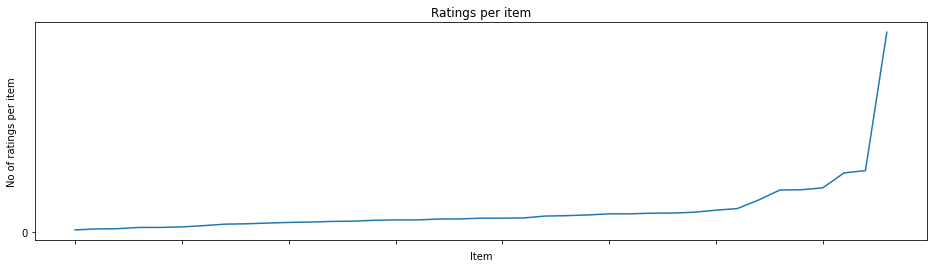

In [49]:
no_of_ratings_per_product = new_df.groupby(by='id')['reviews.rating'].count().sort_values(ascending=True)

fig = plt.figure(figsize=plt.figaspect(.25))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.xlabel('Item')
plt.ylabel('No of ratings per item')
plt.title('Ratings per item')
plt.yticks(np.arange( 0.005))
ax.set_xticklabels([])

plt.show()

In [51]:
#Popular products
c=new_df.groupby('id')['reviews.rating'].count().sort_values(ascending=False)
c.head()

id
AVpgfP3DilAPnD_xtG3M    1604
AVpf3txeLJeJML43FN82     495
AVsRhL-fQMlgsOJE6zvB     477
AVpfnuDailAPnD_xfKZY     357
AVpg8i6NilAPnD_xzQdN     342
Name: reviews.rating, dtype: int64

<AxesSubplot:title={'center':'Popular items ratings'}, ylabel='id'>

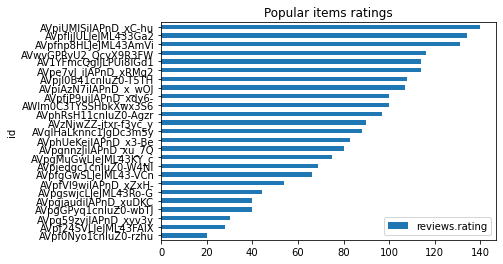

In [52]:
pop_products = pd.DataFrame(new_df.groupby('id')['reviews.rating'].count())
most_popular = pop_products.sort_values('reviews.rating', ascending=True)

most_popular.head(25).plot(kind = "barh", title="Popular items ratings")